# Importing (Library & Data)

In [1]:
import pyiast
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import time
import os
import scipy.optimize as optim
import matplotlib.pyplot as plt

import pyiast
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import time
import os
import scipy.optimize as optim
import matplotlib.pyplot as plt



df_NAME=pd.read_csv("HEAT_210701.csv")

bins_H2S = []
Names_CO2=[]
Names_H2S=[]
for nam in df_NAME["NAME"]:

    Names_CO2.append(nam)
    f_tmp = open("iso_"+nam+"_saved.bin",'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_H2S.append(bin_tmp)
    f_tmp.close()
    
bins_CO2 = []
for nam in df_NAME["NAME"]:
    
    
    Names_H2S.append(nam)
    f_tmp = open("iso_"+nam+"_saved.bin",'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_CO2.append(bin_tmp)
    f_tmp.close()

Name_list=Names_CO2

dH_CO2 = np.array([df_NAME["SF6_HEAT"],df_NAME["N2_HEAT"]]).T
dH_H2S = np.array([df_NAME["SF6_HEAT"],df_NAME["N2_HEAT"]]).T

## Name list

In [2]:
print(Name_list)
print('Total Number of Candidate:')
print(len(Name_list))

['zeolite-13x', 'HKUST-1a', 'UiO-67', 'UiO-66', 'MIL-100(Fe)', 'UiO-67_(sim)', 'HKUST-1_(sim)', 'HKUST-1_(PB)', 'zeolite-13x_(sim)', 'UiO-66_(sim)', 'MIL-100(Fe)_(sim)']
Total Number of Candidate:
11


# Required Functions

## Isotherm

In [26]:
Arrh = lambda T,dH ,T_ref: np.exp(-dH/8.3145*(1/T - 1/T_ref)) # Arrhenius equation (Clasius-Clapeyron Equation)

## Isothermal mixture isotherm
def iso_mix(P_par, T, iso_list, dH_list,Tref_list):
    P_norm = []
    for (p,dh,tref) in zip(P_par, dH_list,Tref_list):
        p_n = Arrh(T,dh,tref)*p 
        P_norm.append(p_n)
    P_norm_arr = np.array(P_norm)
    #print(P_norm_mat.T)
    if P_norm_arr.ndim > 1:
        for i in range(len(P_norm[0])):
            p_tmp = P_norm_arr[i,:]
            p_tmp[p_tmp<0.000001] = 0.000001
            q_IAST_tmp = pyiast.iast(p_tmp,
                                     iso_list,
                                     warningoff=True)
           
    else:
        ind_zero = P_norm_arr < 5e-3
        ind_nonz = ind_zero == False
        #print(ind_nonz)
        if np.sum(ind_nonz)==1:
            iso_tmpp = np.array(iso_list)[ind_nonz]
            #print(iso_tmpp)
            qtmp = iso_tmpp[0].loading(P_norm_arr[ind_nonz])
            q_IAST_tmp = np.zeros(len(iso_list))
            q_IAST_tmp[ind_nonz] = qtmp
            return q_IAST_tmp
        try:
            p_tmp = P_norm_arr
            p_tmp[p_tmp<0.000001] = 0.000001
            #print(p_tmp)
            q_IAST_tmp = pyiast.iast(p_tmp,
                                    iso_list,
                                     warningoff=True)
        except:    
            try:
                #print('Initial guess error with P = ',P_par)
                x_IG = np.ones(len(p_tmp))/len(p_tmp)
                q_IAST_tmp = pyiast.iast(p_tmp,
                                        iso_list,adsorbed_mole_fraction_guess = x_IG,
                                        warningoff=True)
            except:
                try:
                    arg_min = np.argmin(p_tmp)
                    p_tmp[p_tmp<0.000001] = 0.000001
                    x_IG = 0.05*np.ones(len(p_tmp))
                    x_IG[arg_min] = 1 - 0.05*(len(p_tmp)-1)
                    #print(x_IG)
                    q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                except:
                    try:
                        arg_max = np.argmax(p_tmp)
                        p_tmp[p_tmp<0.000001] = 0.000001
                        x_IG = 0.05*np.ones(len(p_tmp))
                        x_IG[arg_max] = 1 - 0.05*(len(p_tmp)-1)
                        #print(x_IG)
                        q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)        
                    except:
                        try:
                            arg_max = np.argmax(p_tmp)
                            p_tmp[p_tmp<0.000001] = 0.000001
                            x_IG = 0.15*np.ones(len(p_tmp))
                            x_IG[arg_max] = 1 - 0.15*(len(p_tmp)-1)
                            #print(x_IG)
                            q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)
                        except:
                            try:
                                arg_min = np.argmin(p_tmp)
                                p_tmp[p_tmp<0.000001] = 0.000001
                                x_IG = 0.01*np.ones(len(p_tmp))
                                x_IG[arg_min] = 1 - 0.01*(len(p_tmp)-1)
                                #print(x_IG)
                                q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                            except:
                                try:
                                    arg_max = np.argmax(p_tmp)
                                    p_tmp[p_tmp<0.000001] = 0.000001
                                    x_IG = 0.01*np.ones(len(p_tmp))
                                    x_IG[arg_max] = 1 - 0.01*(len(p_tmp)-1)
                                    #print(x_IG)
                                    q_IAST_tmp = pyiast.iast(p_tmp,
                                                    iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)        
                                except:
                                    for fr in np.linspace(0.8, 0.99999, 1000):
                                        try:
                                            q_IAST_tmp = pyiast.iast(p_tmp, 
                                                                     iso_list,
                                                                     adsorbed_mole_fraction_guess=[fr, 1-fr],
                                                                    warningoff= True)
                                            break
                                        except:
                                            continue
                                            
    #print(q_IAST_tmp)                             
           
    return q_IAST_tmp

## Saturation fraction

In [27]:
def sat_fraction(y_lead,q_lead_array, y_follow,q_follow_array):
    q_sat_lead_part, q_sat_lead_tot, q_des_lead = q_lead_array
    q_sat_fo, q_des_fo = q_follow_array
    numo = y_follow*(q_sat_lead_part - q_des_lead)+y_lead*q_des_fo
    denom = y_follow*(q_sat_lead_part - q_sat_lead_tot)+y_lead*q_sat_fo
    sat_frac = numo/denom
    return sat_frac

## Single cycle extract gas purity

In [28]:
def x2x(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    iso_1 = iso_input[0] # Ethane (C2H6)
    iso_2 = iso_input[1] # Ethylene (C2H4)
    iso  = [iso_1,iso_2]
    dH_1, dH_2 = dH_input[:2]         # (kJ/mol): Heat of adsorption
    dH = np.array([dH_1,dH_2])*1000    # (J/mol): Heat of adsorption 
    P_low_part = np.array(x_ini)*P_low      # (bar): partial pressure
    P_high_part = np.array(yfeed)*P_high    # (bar): partial pressure
    ### Uptakes
    #print(P_low_part)
    P_low_part = np.reshape(P_low_part,len(iso))
    q_des = iso_mix(P_low_part,Tfeed,iso,
                    dH,Tref_input)

    #print(P_high_part)
    P_high_part = np.reshape(P_high_part,len(iso))
    q_sat_tot = iso_mix(P_high_part,Tfeed,iso,
                        dH,Tref_input)
    Dq_tot = q_sat_tot-q_des
    ### Leading component ?
    sat_extent = np.array(yfeed)/Dq_tot # Saturation extent kg/mol
    ind_lead_tot = np.argmax(sat_extent)
    dq = q_sat_tot - q_des
    x_out = dq/(np.sum(dq))
    return x_out,ind_lead_tot


## PSA at CSS

In [29]:

def rec(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    def x_err(xx):
        x_new,i_lead = x2x([xx, 1-xx],P_high,P_low,
                           iso_input, dH_input, Tref_input, 
                           yfeed,Tfeed)
        return (xx-x_new[0])**2
    #sol = optim.minimize(x_err,x_ini,method='COBYLA')
    sol = optim.least_squares(x_err,x_ini,bounds = [0,1])
    x_sol = sol.x
    _,i_lead = x2x([x_sol, 1- x_sol],P_high,P_low,
                   iso_input, dH_input, Tref_input, 
                   yfeed,Tfeed)
    #if i_lead  < 0.5:
    #    return -1
    Recovery = 1-(1-x_sol)/x_sol*yfeed[0]/yfeed[1]
    if Recovery < 0 or Recovery > 1:
        Recovery = 1-x_sol/(1-x_sol)*yfeed[1]/yfeed[0]
    return Recovery, i_lead, x_sol
  #  return x_sol, i_lead, x_sol
    

## E_per_ndot():Energy consumption of Cascade PSA

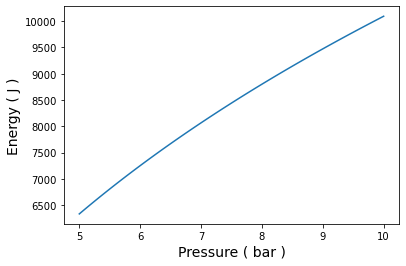

In [30]:
gamma = 1.4
#eta_ef = 0.8
def E_per_ndot(P_h, P_l,T_in,eta_eff):
    P_ratio_term = (P_h/P_l)**((gamma-1)/gamma)-1
    E_comp = (gamma)/(gamma-1)*(8.3145*T_in/eta_eff)*P_ratio_term
    return E_comp
Ph_ran = np.linspace(5,10, 101)
E_res = []
### TESTING ###
for ph in Ph_ran:
    E_tmp = E_per_ndot(ph,1,298.15, 0.8)
    E_res.append(E_tmp)
plt.plot(Ph_ran, np.array(E_res))
plt.xlabel('Pressure ( bar )',fontsize = 14)
plt.ylabel('Energy ( J )',fontsize = 14)
plt.show()
### TESTING ###


In [31]:
def E_per_ndot2(Ph1,Ph2,Pf,Pl,
                y_prod,x_prod1,T_input,eta1,eta2):
    E1 = E_per_ndot(Ph1,Pf,T_input,eta1)
    E2 = E_per_ndot(Ph2,Pl,T_input,eta2)
    numo = E1+E2*y_prod/x_prod1
    denom = y_prod
    E_tot_over_ndot_prod = numo/denom
    return E_tot_over_ndot_prod

## PSA2():Cascade PSA process

In [32]:
def PSA2(P_high1,P_high2,P_low,P_feed,
         iso_input,dH_input,Tref_input,
         yfeed1,Tfeed,x_gu1, x_gu2):
    Rec1,i_lead1, x_ex1 = rec(x_gu1, P_high1, P_low,
                             iso_input, dH_input,Tref_input,
                              yfeed1,Tfeed)
    yfeed2 = np.array([x_ex1,1-x_ex1])
    Rec2,i_lead2, x_ex2 = rec(x_gu2, P_high2, P_low,
                             iso_input, dH_input,Tref_input,
                              yfeed2,Tfeed)
    eta1_in = 0.8
    eta2_in = 0.8
    if Rec1 > 0 and Rec2 > 0:
        E_per_prod = E_per_ndot2(P_high1,P_high2,P_feed,P_low,
                                 yfeed1[0],x_ex1,Tfeed,
                                 eta1_in,eta2_in)
    return E_per_prod,x_ex2

# Execution for Various Adsorbents

## Ideal PSA Simul.

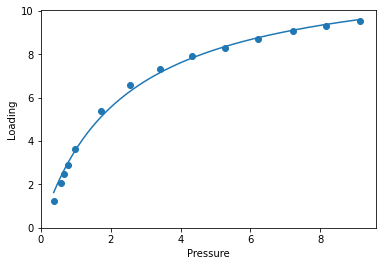

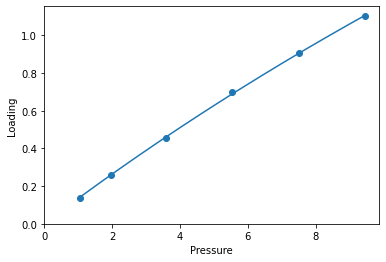

In [33]:
pyiast.plot_isotherm(bins_CO2[2][0])
pyiast.plot_isotherm(bins_CO2[2][1])

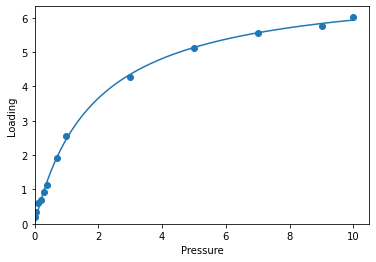

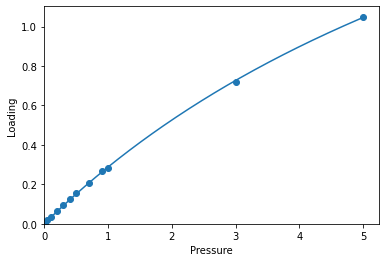

2 components.
	Partial pressure component 0 = 0.500000
	Partial pressure component 1 = 4.500000
Component  0
	p =  0.5
	p^0 =  0.7910152039581783
	Loading:  1.2297363529345164
	x =  0.6320991018858286
	Spreading pressure =  2.5095370762645697
Component  1
	p =  4.5
	p^0 =  12.231554810185614
	Loading:  0.715743951128049
	x =  0.36790089811417137
	Spreading pressure =  2.5095370762645683
                      Component 1: p^0 = 12.231555 > 5.000000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.


'MIL-100(Fe)_(sim)'

In [82]:
#p_tmp = [0.5, 4.5]
pyiast.plot_isotherm(bins_CO2[10][0])
pyiast.plot_isotherm(bins_CO2[10][1])

p_tmp = [0.5,4.5]
#p_tmp = [0.1, 0.9]
q_tmp = pyiast.iast(p_tmp, bins_CO2[10],verboseflag=True)
Name_list[10]

               #     adsorbed_mole_fraction_guess= [0.99, 0.01])


In [35]:
#p_tmp = [0.99674906, 0.00325094]
#p_tmp = [0.90, 0.1]
#p_tmp = [0.5, 0.5]
#q_tmp = pyiast.iast(p_tmp, bins_CO2[2],adsorbed_mole_fraction_guess= [0.4, 0.6])
#for fr in np.linspace(0.5,0.999, 1001):
#    try:
#        q_tmp = pyiast.iast(p_tmp, bins_CO2[1],
#                            adsorbed_mole_fraction_guess=[fr, 1-fr])
#        print(q_tmp)
#        print([fr, 1-fr])
#        break
#    except:
#        continue
        

In [44]:
P_h_range = np.arange(3,5,1)

T_feed_in = 313         # (K) temperature or 298K
T_tri = [298.15,]*2
#y_feed_in = np.array([0.83356,0.1644])
y_ethy = 9/10
#y_ethy = 0.83356
y_feed_in = np.array([1-y_ethy,y_ethy])
Rec_list_set = []
leading_index_set = []
xx_list_set = []
#Pl_list = np.linspace(0.004,0.5,30)


for binn,dH,nam in zip(bins_CO2[0:],dH_CO2[0:],Name_list[0:]):
    Rec_list = []
    leading_index = []
    xx_list = []
    x_guess = np.array([0.1,0.9])
    for ph in P_h_range:
        rec_tmp,l_ind,x_tmp = rec(x_guess[0], ph,1,
                                  binn, dH, T_tri,y_feed_in, T_feed_in)
        #x_guess[0] = x_tmp*1.01
        Rec_list.append(rec_tmp)
        leading_index.append(l_ind)
        xx_list.append(x_tmp)
    Rec_list_set.append(Rec_list)
    leading_index_set.append(leading_index)
    xx_list_set.append(xx_list)
    print(nam)
    #print(Rec_list[-1])

[0.41273645 0.18122491]
[0.84774367 0.40118892]
[0.4127365 0.1812249]
[0.84774367 0.40118892]
[0.6578649 0.1496542]
[0.84774367 0.40118892]
[0.65786494 0.14965419]
[0.84774367 0.40118892]
[0.7235575  0.14103815]
[0.84774367 0.40118892]
[0.72355754 0.14103815]
[0.84774367 0.40118892]
[0.74901417 0.13767963]
[0.84774367 0.40118892]
[0.7490142  0.13767962]
[0.84774367 0.40118892]
[0.7603658  0.13617832]
[0.84774367 0.40118892]
[0.76036583 0.13617832]
[0.84774367 0.40118892]
[0.76574123 0.13546659]
[0.84774367 0.40118892]
[0.76574127 0.13546659]
[0.84774367 0.40118892]
[0.76835861 0.13511985]
[0.84774367 0.40118892]
[0.76835865 0.13511985]
[0.84774367 0.40118892]
[0.76965028 0.13494869]
[0.84774367 0.40118892]
[0.76965031 0.13494869]
[0.84774367 0.40118892]
[0.77029192 0.13486366]
[0.84774367 0.40118892]
[0.77029196 0.13486365]
[0.84774367 0.40118892]
[0.7706117  0.13482127]
[0.84774367 0.40118892]
[0.77061174 0.13482127]
[0.84774367 0.40118892]
[0.7706117  0.13482127]
[0.84774367 0.401188

[1.76165966 0.33931618]
[0.78479779 0.15257293]
[2.08659068 0.4002852 ]
[0.78479789 0.15257292]
[2.08659068 0.4002852 ]
[1.38025123 0.11877913]
[2.08659068 0.4002852 ]
[1.38025131 0.11877913]
[2.08659068 0.4002852 ]
[1.7818321  0.09609639]
[2.08659068 0.4002852 ]
[1.78183217 0.09609639]
[2.08659068 0.4002852 ]
[1.87483433 0.09085774]
[2.08659068 0.4002852 ]
[1.87483439 0.09085773]
[2.08659068 0.4002852 ]
[1.90905035 0.08893189]
[2.08659068 0.4002852 ]
[1.90905041 0.08893188]
[2.08659068 0.4002852 ]
[1.92402701 0.08808918]
[2.08659068 0.4002852 ]
[1.92402707 0.08808918]
[2.08659068 0.4002852 ]
[1.93106319 0.08769332]
[2.08659068 0.4002852 ]
[1.93106325 0.08769332]
[2.08659068 0.4002852 ]
[1.93447671 0.08750129]
[2.08659068 0.4002852 ]
[1.93447677 0.08750128]
[2.08659068 0.4002852 ]
[1.93615831 0.08740669]
[2.08659068 0.4002852 ]
[1.93615837 0.08740669]
[2.08659068 0.4002852 ]
[1.93699293 0.08735974]
[2.08659068 0.4002852 ]
[1.93699299 0.08735974]
[2.08659068 0.4002852 ]
[1.93740872 0.08

# Sorting and Graphs

## Sorting

In [14]:
xx_sort_tmp = []
for i in range(len(xx_list_set)):
    xx_tmm = np.reshape(np.array(xx_list_set[i]),[-1])
    xx_sort_tmp.append(xx_tmm)
xx_sort_tmp = np.array(xx_sort_tmp)

Sort_target = np.reshape(np.array(xx_sort_tmp)[:,-1],-1)
#print(Sort_target)
arg_st = np.argsort(Sort_target)[::-1]
Name_sort = np.array(Name_list)[arg_st]

xx_sort = xx_sort_tmp[arg_st,:]
leading_sort = np.array(leading_index_set)[arg_st]
#is_exp_sort = is_exp[arg_st]

#print(P_h_range[-5]*100)
#print(Name_sort)
#print(Rec_sort[:,-5])

IndexError: too many indices for array

In [86]:
iii = 1
for NNN in Name_sort:
    print('{}:'.format(iii),
          '{0:s} //'.format(NNN), 'Index : {}'.format(arg_st[iii-1]) )
    iii = iii+1

1: HKUST-1a // Index : 1
2: UiO-67 // Index : 2
3: UiO-67_(sim) // Index : 5
4: HKUST-1_(PB) // Index : 7
5: MIL-100(Fe) // Index : 4
6: HKUST-1_(sim) // Index : 6
7: UiO-66 // Index : 3
8: zeolite-13x_(sim) // Index : 8
9: zeolite-13x // Index : 0
10: MIL-100(Fe)_(sim) // Index : 10
11: UiO-66_(sim) // Index : 9


In [87]:
print(Name_sort)

['HKUST-1a' 'UiO-67' 'UiO-67_(sim)' 'HKUST-1_(PB)' 'MIL-100(Fe)'
 'HKUST-1_(sim)' 'UiO-66' 'zeolite-13x_(sim)' 'zeolite-13x'
 'MIL-100(Fe)_(sim)' 'UiO-66_(sim)']


## Graphs

## Save above data

['HKUST-1a' 'UiO-67' 'UiO-67_(sim)' 'HKUST-1_(PB)' 'MIL-100(Fe)'
 'HKUST-1_(sim)' 'UiO-66' 'zeolite-13x_(sim)' 'zeolite-13x'
 'MIL-100(Fe)_(sim)' 'UiO-66_(sim)']


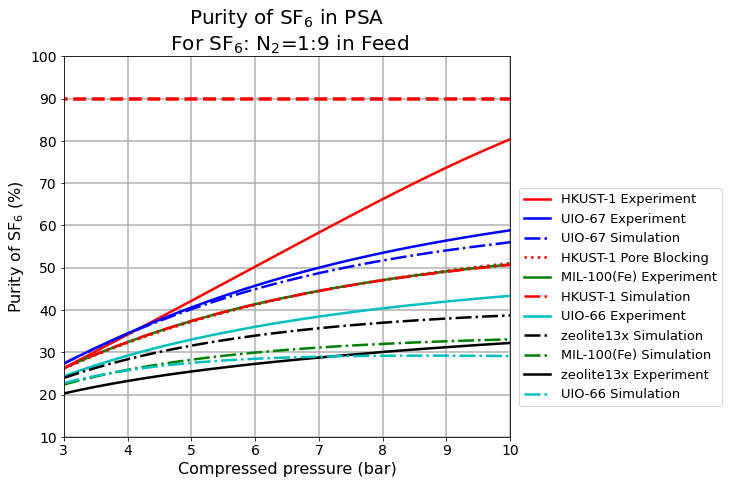

In [88]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]
for line in line_len:
    for space in space_len:
        style_temp = (line, space)
        l_style.append((0,style_temp))
L_styles = ['solid','dotted','dashdot','dashed'] + [(0,(3,5,1,5,1,5))]
c_list = ['k','b','g','r']
cc = 0
lc = 0

print(Name_sort)
## Semilog graph
plt.figure(figsize= [8,7])


plt.plot(P_h_range,np.array(xx_sort[0])*100, color = 'r',linewidth = 2.5,alpha=1,label='HKUST-1 Experiment')
plt.plot(P_h_range,np.array(xx_sort[1])*100, color = 'b',linewidth = 2.5,alpha=1,label='UIO-67 Experiment')
plt.plot(P_h_range,np.array(xx_sort[2])*100, color = 'b',linewidth = 2.5,alpha=1,label='UIO-67 Simulation',ls='dashdot')
plt.plot(P_h_range,np.array(xx_sort[3])*100, color = 'r',linewidth = 2.5,alpha=1,label='HKUST-1 Pore Blocking', ls='dotted')         
plt.plot(P_h_range,np.array(xx_sort[4])*100, color = 'g',linewidth = 2.5,alpha=1,label='MIL-100(Fe) Experiment')         
plt.plot(P_h_range,np.array(xx_sort[5])*100, color = 'r',linewidth = 2.5,alpha=1,label='HKUST-1 Simulation', ls='dashdot')
plt.plot(P_h_range,np.array(xx_sort[6])*100, color = 'c',linewidth = 2.5,alpha=1,label='UIO-66 Experiment')
plt.plot(P_h_range,np.array(xx_sort[7])*100, color = 'k',linewidth = 2.5,alpha=1,label='zeolite13x Simulation',ls='dashdot')
plt.plot(P_h_range,np.array(xx_sort[8])*100, color = 'g',linewidth = 2.5,alpha=1,label='MIL-100(Fe) Simulation',ls='dashdot')
plt.plot(P_h_range,np.array(xx_sort[9])*100, color = 'k',linewidth = 2.5,alpha=1,label='zeolite13x Experiment')
plt.plot(P_h_range,np.array(xx_sort[10])*100 ,color = 'c',linewidth = 2.5,alpha=1,label='UIO-66 Simulation',ls='dashdot')





plt.plot([0,P_h_range[-1]],[90 ,90],ls='--',lw='3.5',color='r')
## Grid
plt.grid(which = 'major',ls ='-',linewidth = 1.5)
plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)
## Legend
plt.legend(fontsize = 13,loc = (1.02,0.08))
## x,y axis
plt.xlabel('Compressed pressure (bar)',fontsize = 16)
plt.ylabel('Purity of SF$_6$ (%)',fontsize= 16)
plt.xlim([3, 10])
#plt.xticks(ticks= [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
#           labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14'],
#           fontsize = 12.5)
plt.xticks(fontsize =14)
plt.yticks(ticks= [10,20,30,40,50,60,70,80,90,100],
           labels = ['10','20','30','40','50','60','70','80','90','100'],
           fontsize = 14)
plt.title('Purity of SF$_6$ in PSA\n For SF$_6$: N$_2$=1:9 in Feed',fontsize = 20)
plt.savefig('Purity_PSA_1vs9.png')
plt.show()

In [89]:
print(np.array(xx_sort).T.shape)
print(np.reshape(P_h_range,[-1,1]).shape)

(29, 11)
(29, 1)


In [90]:
save_4_2_graph = np.concatenate((np.reshape(P_h_range,[-1,1]), np.array(xx_sort).T),1)
save_4_2_graph_pd = pd.DataFrame(save_4_2_graph)
save_4_2_graph_pd.to_excel('SecNum_4_2_single_purity.xlsx')

# Cascade PSA Proces

## Take Sample

In [91]:
ind_sam = 2
bin_sam = bins_CO2[ind_sam]
dH_sam = dH_CO2[ind_sam]
Name_sam = Name_list[ind_sam]
print(Name_sam)

UiO-67


## Execution of Cas. PSA sim.

In [92]:
#P_ran_1 = np.linspace(6,20,14*2+1)
#P_ran_2 = np.linspace(6,20,14*2+1)
P_ran_1 = np.linspace(3.5,10,17*4+1)
P_ran_2 = np.linspace(3.5,10,17*4+1)
P_low_interm = 1

T_tri2 = [298,298]

P_feed2 = 1
y_feed2 = [0.1, 0.9]
T_feed2 = 298

E_per_n_2d =[]
x_prod_2d = []

for p1 in P_ran_1:
    EEE_list = []
    xxx_list = []
    for p2 in P_ran_2:
        try:
            xg1 = 0.3
            xg2 = 0.7
            E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                               bin_sam,dH_sam,T_tri2,
                               y_feed2,T_feed2,xg1,xg2)
        except:
            try:
                xg1 = 0.4
                xg2 = 0.75
                E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                   bin_sam,dH_sam,T_tri2,
                                   y_feed2,T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.4
                    xg2 = 0.85
                    E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                       bin_sam,dH_sam,T_tri2,
                                       y_feed2,T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.7
                        xg2 = 0.90
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_sam,dH_sam,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)
                    except:
                        xg1 = 0.8
                        xg2 = 0.98
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_sam,dH_sam,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)

        EEE_list.append(E_tmp[0])
        xxx_list.append(x_tmp[0])
        print(p1,p2)
    E_per_n_2d.append(EEE_list)
    x_prod_2d.append(xxx_list)
    


3.5 3.5
3.5 3.5955882352941178
3.5 3.6911764705882355
3.5 3.786764705882353
3.5 3.8823529411764706
3.5 3.9779411764705883
3.5 4.073529411764706
3.5 4.169117647058823
3.5 4.264705882352941
3.5 4.360294117647059
3.5 4.455882352941177
3.5 4.5514705882352935
3.5 4.647058823529411
3.5 4.742647058823529
3.5 4.838235294117647
3.5 4.9338235294117645
3.5 5.029411764705882
3.5 5.125
3.5 5.220588235294118
3.5 5.3161764705882355
3.5 5.411764705882353
3.5 5.507352941176471
3.5 5.602941176470588
3.5 5.698529411764706
3.5 5.794117647058823
3.5 5.889705882352941
3.5 5.985294117647059
3.5 6.080882352941176
3.5 6.1764705882352935
3.5 6.272058823529411
3.5 6.367647058823529
3.5 6.463235294117647
3.5 6.5588235294117645
3.5 6.654411764705882
3.5 6.75
3.5 6.845588235294118
3.5 6.9411764705882355
3.5 7.036764705882353
3.5 7.13235294117647
3.5 7.227941176470588
3.5 7.323529411764706
3.5 7.419117647058823
3.5 7.514705882352941
3.5 7.610294117647059
3.5 7.705882352941176
3.5 7.8014705882352935
3.5 7.89705882352

C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


3.5 9.808823529411764
3.5 9.904411764705882
3.5 10.0
3.5955882352941178 3.5
3.5955882352941178 3.5955882352941178
3.5955882352941178 3.6911764705882355
3.5955882352941178 3.786764705882353
3.5955882352941178 3.8823529411764706
3.5955882352941178 3.9779411764705883
3.5955882352941178 4.073529411764706
3.5955882352941178 4.169117647058823
3.5955882352941178 4.264705882352941
3.5955882352941178 4.360294117647059
3.5955882352941178 4.455882352941177
3.5955882352941178 4.5514705882352935
3.5955882352941178 4.647058823529411
3.5955882352941178 4.742647058823529
3.5955882352941178 4.838235294117647
3.5955882352941178 4.9338235294117645
3.5955882352941178 5.029411764705882
3.5955882352941178 5.125
3.5955882352941178 5.220588235294118
3.5955882352941178 5.3161764705882355
3.5955882352941178 5.411764705882353
3.5955882352941178 5.507352941176471
3.5955882352941178 5.602941176470588
3.5955882352941178 5.698529411764706
3.5955882352941178 5.794117647058823
3.5955882352941178 5.889705882352941
3.59

3.8823529411764706 5.602941176470588
3.8823529411764706 5.698529411764706
3.8823529411764706 5.794117647058823
3.8823529411764706 5.889705882352941
3.8823529411764706 5.985294117647059
3.8823529411764706 6.080882352941176
3.8823529411764706 6.1764705882352935
3.8823529411764706 6.272058823529411
3.8823529411764706 6.367647058823529
3.8823529411764706 6.463235294117647
3.8823529411764706 6.5588235294117645
3.8823529411764706 6.654411764705882
3.8823529411764706 6.75
3.8823529411764706 6.845588235294118
3.8823529411764706 6.9411764705882355
3.8823529411764706 7.036764705882353
3.8823529411764706 7.13235294117647
3.8823529411764706 7.227941176470588
3.8823529411764706 7.323529411764706
3.8823529411764706 7.419117647058823
3.8823529411764706 7.514705882352941
3.8823529411764706 7.610294117647059
3.8823529411764706 7.705882352941176
3.8823529411764706 7.8014705882352935
3.8823529411764706 7.897058823529411
3.8823529411764706 7.992647058823529
3.8823529411764706 8.088235294117647
3.882352941

4.169117647058823 8.279411764705882
4.169117647058823 8.375
4.169117647058823 8.470588235294118
4.169117647058823 8.566176470588236
4.169117647058823 8.661764705882351
4.169117647058823 8.757352941176471
4.169117647058823 8.852941176470587
4.169117647058823 8.948529411764707
4.169117647058823 9.044117647058822
4.169117647058823 9.139705882352942
4.169117647058823 9.235294117647058
4.169117647058823 9.330882352941176
4.169117647058823 9.426470588235293
4.169117647058823 9.522058823529411
4.169117647058823 9.617647058823529
4.169117647058823 9.713235294117647
4.169117647058823 9.808823529411764
4.169117647058823 9.904411764705882
4.169117647058823 10.0
4.264705882352941 3.5
4.264705882352941 3.5955882352941178
4.264705882352941 3.6911764705882355
4.264705882352941 3.786764705882353
4.264705882352941 3.8823529411764706
4.264705882352941 3.9779411764705883
4.264705882352941 4.073529411764706
4.264705882352941 4.169117647058823
4.264705882352941 4.264705882352941
4.264705882352941 4.3602941

4.5514705882352935 4.169117647058823
4.5514705882352935 4.264705882352941
4.5514705882352935 4.360294117647059
4.5514705882352935 4.455882352941177
4.5514705882352935 4.5514705882352935
4.5514705882352935 4.647058823529411
4.5514705882352935 4.742647058823529
4.5514705882352935 4.838235294117647
4.5514705882352935 4.9338235294117645
4.5514705882352935 5.029411764705882
4.5514705882352935 5.125
4.5514705882352935 5.220588235294118
4.5514705882352935 5.3161764705882355
4.5514705882352935 5.411764705882353
4.5514705882352935 5.507352941176471
4.5514705882352935 5.602941176470588
4.5514705882352935 5.698529411764706
4.5514705882352935 5.794117647058823
4.5514705882352935 5.889705882352941
4.5514705882352935 5.985294117647059
4.5514705882352935 6.080882352941176
4.5514705882352935 6.1764705882352935
4.5514705882352935 6.272058823529411
4.5514705882352935 6.367647058823529
4.5514705882352935 6.463235294117647
4.5514705882352935 6.5588235294117645
4.5514705882352935 6.654411764705882
4.551470

4.838235294117647 7.036764705882353
4.838235294117647 7.13235294117647
4.838235294117647 7.227941176470588
4.838235294117647 7.323529411764706
4.838235294117647 7.419117647058823
4.838235294117647 7.514705882352941
4.838235294117647 7.610294117647059
4.838235294117647 7.705882352941176
4.838235294117647 7.8014705882352935
4.838235294117647 7.897058823529411
4.838235294117647 7.992647058823529
4.838235294117647 8.088235294117647
4.838235294117647 8.183823529411764
4.838235294117647 8.279411764705882
4.838235294117647 8.375
4.838235294117647 8.470588235294118
4.838235294117647 8.566176470588236
4.838235294117647 8.661764705882351
4.838235294117647 8.757352941176471
4.838235294117647 8.852941176470587
4.838235294117647 8.948529411764707
4.838235294117647 9.044117647058822
4.838235294117647 9.139705882352942
4.838235294117647 9.235294117647058
4.838235294117647 9.330882352941176
4.838235294117647 9.426470588235293
4.838235294117647 9.522058823529411
4.838235294117647 9.617647058823529
4.83

5.220588235294118 5.794117647058823
5.220588235294118 5.889705882352941
5.220588235294118 5.985294117647059
5.220588235294118 6.080882352941176
5.220588235294118 6.1764705882352935
5.220588235294118 6.272058823529411
5.220588235294118 6.367647058823529
5.220588235294118 6.463235294117647
5.220588235294118 6.5588235294117645
5.220588235294118 6.654411764705882
5.220588235294118 6.75
5.220588235294118 6.845588235294118
5.220588235294118 6.9411764705882355
5.220588235294118 7.036764705882353
5.220588235294118 7.13235294117647
5.220588235294118 7.227941176470588
5.220588235294118 7.323529411764706
5.220588235294118 7.419117647058823
5.220588235294118 7.514705882352941
5.220588235294118 7.610294117647059
5.220588235294118 7.705882352941176
5.220588235294118 7.8014705882352935
5.220588235294118 7.897058823529411
5.220588235294118 7.992647058823529
5.220588235294118 8.088235294117647
5.220588235294118 8.183823529411764
5.220588235294118 8.279411764705882
5.220588235294118 8.375
5.220588235294

5.507352941176471 8.852941176470587
5.507352941176471 8.948529411764707
5.507352941176471 9.044117647058822
5.507352941176471 9.139705882352942
5.507352941176471 9.235294117647058
5.507352941176471 9.330882352941176
5.507352941176471 9.426470588235293
5.507352941176471 9.522058823529411
5.507352941176471 9.617647058823529
5.507352941176471 9.713235294117647
5.507352941176471 9.808823529411764
5.507352941176471 9.904411764705882
5.507352941176471 10.0
5.602941176470588 3.5
5.602941176470588 3.5955882352941178
5.602941176470588 3.6911764705882355
5.602941176470588 3.786764705882353
5.602941176470588 3.8823529411764706
5.602941176470588 3.9779411764705883
5.602941176470588 4.073529411764706
5.602941176470588 4.169117647058823
5.602941176470588 4.264705882352941
5.602941176470588 4.360294117647059
5.602941176470588 4.455882352941177
5.602941176470588 4.5514705882352935
5.602941176470588 4.647058823529411
5.602941176470588 4.742647058823529
5.602941176470588 4.838235294117647
5.602941176470

5.889705882352941 5.029411764705882
5.889705882352941 5.125
5.889705882352941 5.220588235294118
5.889705882352941 5.3161764705882355
5.889705882352941 5.411764705882353
5.889705882352941 5.507352941176471
5.889705882352941 5.602941176470588
5.889705882352941 5.698529411764706
5.889705882352941 5.794117647058823
5.889705882352941 5.889705882352941
5.889705882352941 5.985294117647059
5.889705882352941 6.080882352941176
5.889705882352941 6.1764705882352935
5.889705882352941 6.272058823529411
5.889705882352941 6.367647058823529
5.889705882352941 6.463235294117647
5.889705882352941 6.5588235294117645
5.889705882352941 6.654411764705882
5.889705882352941 6.75
5.889705882352941 6.845588235294118
5.889705882352941 6.9411764705882355
5.889705882352941 7.036764705882353
5.889705882352941 7.13235294117647
5.889705882352941 7.227941176470588
5.889705882352941 7.323529411764706
5.889705882352941 7.419117647058823
5.889705882352941 7.514705882352941
5.889705882352941 7.610294117647059
5.889705882352

6.1764705882352935 7.514705882352941
6.1764705882352935 7.610294117647059
6.1764705882352935 7.705882352941176
6.1764705882352935 7.8014705882352935
6.1764705882352935 7.897058823529411
6.1764705882352935 7.992647058823529
6.1764705882352935 8.088235294117647
6.1764705882352935 8.183823529411764
6.1764705882352935 8.279411764705882
6.1764705882352935 8.375
6.1764705882352935 8.470588235294118
6.1764705882352935 8.566176470588236
6.1764705882352935 8.661764705882351
6.1764705882352935 8.757352941176471
6.1764705882352935 8.852941176470587
6.1764705882352935 8.948529411764707
6.1764705882352935 9.044117647058822
6.1764705882352935 9.139705882352942
6.1764705882352935 9.235294117647058
6.1764705882352935 9.330882352941176
6.1764705882352935 9.426470588235293
6.1764705882352935 9.522058823529411
6.1764705882352935 9.617647058823529
6.1764705882352935 9.713235294117647
6.1764705882352935 9.808823529411764
6.1764705882352935 9.904411764705882
6.1764705882352935 10.0
6.272058823529411 3.5
6.2

6.5588235294117645 4.169117647058823
6.5588235294117645 4.264705882352941
6.5588235294117645 4.360294117647059
6.5588235294117645 4.455882352941177
6.5588235294117645 4.5514705882352935
6.5588235294117645 4.647058823529411
6.5588235294117645 4.742647058823529
6.5588235294117645 4.838235294117647
6.5588235294117645 4.9338235294117645
6.5588235294117645 5.029411764705882
6.5588235294117645 5.125
6.5588235294117645 5.220588235294118
6.5588235294117645 5.3161764705882355
6.5588235294117645 5.411764705882353
6.5588235294117645 5.507352941176471
6.5588235294117645 5.602941176470588
6.5588235294117645 5.698529411764706
6.5588235294117645 5.794117647058823
6.5588235294117645 5.889705882352941
6.5588235294117645 5.985294117647059
6.5588235294117645 6.080882352941176
6.5588235294117645 6.1764705882352935
6.5588235294117645 6.272058823529411
6.5588235294117645 6.367647058823529
6.5588235294117645 6.463235294117647
6.5588235294117645 6.5588235294117645
6.5588235294117645 6.654411764705882
6.558823

6.845588235294118 9.522058823529411
6.845588235294118 9.617647058823529
6.845588235294118 9.713235294117647
6.845588235294118 9.808823529411764
6.845588235294118 9.904411764705882
6.845588235294118 10.0
6.9411764705882355 3.5
6.9411764705882355 3.5955882352941178
6.9411764705882355 3.6911764705882355
6.9411764705882355 3.786764705882353
6.9411764705882355 3.8823529411764706
6.9411764705882355 3.9779411764705883
6.9411764705882355 4.073529411764706
6.9411764705882355 4.169117647058823
6.9411764705882355 4.264705882352941
6.9411764705882355 4.360294117647059
6.9411764705882355 4.455882352941177
6.9411764705882355 4.5514705882352935
6.9411764705882355 4.647058823529411
6.9411764705882355 4.742647058823529
6.9411764705882355 4.838235294117647
6.9411764705882355 4.9338235294117645
6.9411764705882355 5.029411764705882
6.9411764705882355 5.125
6.9411764705882355 5.220588235294118
6.9411764705882355 5.3161764705882355
6.9411764705882355 5.411764705882353
6.9411764705882355 5.507352941176471
6.

7.227941176470588 5.507352941176471
7.227941176470588 5.602941176470588
7.227941176470588 5.698529411764706
7.227941176470588 5.794117647058823
7.227941176470588 5.889705882352941
7.227941176470588 5.985294117647059
7.227941176470588 6.080882352941176
7.227941176470588 6.1764705882352935
7.227941176470588 6.272058823529411
7.227941176470588 6.367647058823529
7.227941176470588 6.463235294117647
7.227941176470588 6.5588235294117645
7.227941176470588 6.654411764705882
7.227941176470588 6.75
7.227941176470588 6.845588235294118
7.227941176470588 6.9411764705882355
7.227941176470588 7.036764705882353
7.227941176470588 7.13235294117647
7.227941176470588 7.227941176470588
7.227941176470588 7.323529411764706
7.227941176470588 7.419117647058823
7.227941176470588 7.514705882352941
7.227941176470588 7.610294117647059
7.227941176470588 7.705882352941176
7.227941176470588 7.8014705882352935
7.227941176470588 7.897058823529411
7.227941176470588 7.992647058823529
7.227941176470588 8.088235294117647
7.

7.514705882352941 8.088235294117647
7.514705882352941 8.183823529411764
7.514705882352941 8.279411764705882
7.514705882352941 8.375
7.514705882352941 8.470588235294118
7.514705882352941 8.566176470588236
7.514705882352941 8.661764705882351
7.514705882352941 8.757352941176471
7.514705882352941 8.852941176470587
7.514705882352941 8.948529411764707
7.514705882352941 9.044117647058822
7.514705882352941 9.139705882352942
7.514705882352941 9.235294117647058
7.514705882352941 9.330882352941176
7.514705882352941 9.426470588235293
7.514705882352941 9.522058823529411
7.514705882352941 9.617647058823529
7.514705882352941 9.713235294117647
7.514705882352941 9.808823529411764
7.514705882352941 9.904411764705882
7.514705882352941 10.0
7.610294117647059 3.5
7.610294117647059 3.5955882352941178
7.610294117647059 3.6911764705882355
7.610294117647059 3.786764705882353
7.610294117647059 3.8823529411764706
7.610294117647059 3.9779411764705883
7.610294117647059 4.073529411764706
7.610294117647059 4.1691176

7.897058823529411 4.5514705882352935
7.897058823529411 4.647058823529411
7.897058823529411 4.742647058823529
7.897058823529411 4.838235294117647
7.897058823529411 4.9338235294117645
7.897058823529411 5.029411764705882
7.897058823529411 5.125
7.897058823529411 5.220588235294118
7.897058823529411 5.3161764705882355
7.897058823529411 5.411764705882353
7.897058823529411 5.507352941176471
7.897058823529411 5.602941176470588
7.897058823529411 5.698529411764706
7.897058823529411 5.794117647058823
7.897058823529411 5.889705882352941
7.897058823529411 5.985294117647059
7.897058823529411 6.080882352941176
7.897058823529411 6.1764705882352935
7.897058823529411 6.272058823529411
7.897058823529411 6.367647058823529
7.897058823529411 6.463235294117647
7.897058823529411 6.5588235294117645
7.897058823529411 6.654411764705882
7.897058823529411 6.75
7.897058823529411 6.845588235294118
7.897058823529411 6.9411764705882355
7.897058823529411 7.036764705882353
7.897058823529411 7.13235294117647
7.8970588235

8.183823529411764 7.13235294117647
8.183823529411764 7.227941176470588
8.183823529411764 7.323529411764706
8.183823529411764 7.419117647058823
8.183823529411764 7.514705882352941
8.183823529411764 7.610294117647059
8.183823529411764 7.705882352941176
8.183823529411764 7.8014705882352935
8.183823529411764 7.897058823529411
8.183823529411764 7.992647058823529
8.183823529411764 8.088235294117647
8.183823529411764 8.183823529411764
8.183823529411764 8.279411764705882
8.183823529411764 8.375
8.183823529411764 8.470588235294118
8.183823529411764 8.566176470588236
8.183823529411764 8.661764705882351
8.183823529411764 8.757352941176471
8.183823529411764 8.852941176470587
8.183823529411764 8.948529411764707
8.183823529411764 9.044117647058822
8.183823529411764 9.139705882352942
8.183823529411764 9.235294117647058
8.183823529411764 9.330882352941176
8.183823529411764 9.426470588235293
8.183823529411764 9.522058823529411
8.183823529411764 9.617647058823529
8.183823529411764 9.713235294117647
8.18

8.566176470588236 5.794117647058823
8.566176470588236 5.889705882352941
8.566176470588236 5.985294117647059
8.566176470588236 6.080882352941176
8.566176470588236 6.1764705882352935
8.566176470588236 6.272058823529411
8.566176470588236 6.367647058823529
8.566176470588236 6.463235294117647
8.566176470588236 6.5588235294117645
8.566176470588236 6.654411764705882
8.566176470588236 6.75
8.566176470588236 6.845588235294118
8.566176470588236 6.9411764705882355
8.566176470588236 7.036764705882353
8.566176470588236 7.13235294117647
8.566176470588236 7.227941176470588
8.566176470588236 7.323529411764706
8.566176470588236 7.419117647058823
8.566176470588236 7.514705882352941
8.566176470588236 7.610294117647059
8.566176470588236 7.705882352941176
8.566176470588236 7.8014705882352935
8.566176470588236 7.897058823529411
8.566176470588236 7.992647058823529
8.566176470588236 8.088235294117647
8.566176470588236 8.183823529411764
8.566176470588236 8.279411764705882
8.566176470588236 8.375
8.566176470588

8.852941176470587 8.566176470588236
8.852941176470587 8.661764705882351
8.852941176470587 8.757352941176471
8.852941176470587 8.852941176470587
8.852941176470587 8.948529411764707
8.852941176470587 9.044117647058822
8.852941176470587 9.139705882352942
8.852941176470587 9.235294117647058
8.852941176470587 9.330882352941176
8.852941176470587 9.426470588235293
8.852941176470587 9.522058823529411
8.852941176470587 9.617647058823529
8.852941176470587 9.713235294117647
8.852941176470587 9.808823529411764
8.852941176470587 9.904411764705882
8.852941176470587 10.0
8.948529411764707 3.5
8.948529411764707 3.5955882352941178
8.948529411764707 3.6911764705882355
8.948529411764707 3.786764705882353
8.948529411764707 3.8823529411764706
8.948529411764707 3.9779411764705883
8.948529411764707 4.073529411764706
8.948529411764707 4.169117647058823
8.948529411764707 4.264705882352941
8.948529411764707 4.360294117647059
8.948529411764707 4.455882352941177
8.948529411764707 4.5514705882352935
8.948529411764

9.235294117647058 4.455882352941177
9.235294117647058 4.5514705882352935
9.235294117647058 4.647058823529411
9.235294117647058 4.742647058823529
9.235294117647058 4.838235294117647
9.235294117647058 4.9338235294117645
9.235294117647058 5.029411764705882
9.235294117647058 5.125
9.235294117647058 5.220588235294118
9.235294117647058 5.3161764705882355
9.235294117647058 5.411764705882353
9.235294117647058 5.507352941176471
9.235294117647058 5.602941176470588
9.235294117647058 5.698529411764706
9.235294117647058 5.794117647058823
9.235294117647058 5.889705882352941
9.235294117647058 5.985294117647059
9.235294117647058 6.080882352941176
9.235294117647058 6.1764705882352935
9.235294117647058 6.272058823529411
9.235294117647058 6.367647058823529
9.235294117647058 6.463235294117647
9.235294117647058 6.5588235294117645
9.235294117647058 6.654411764705882
9.235294117647058 6.75
9.235294117647058 6.845588235294118
9.235294117647058 6.9411764705882355
9.235294117647058 7.036764705882353
9.235294117

9.522058823529411 7.8014705882352935
9.522058823529411 7.897058823529411
9.522058823529411 7.992647058823529
9.522058823529411 8.088235294117647
9.522058823529411 8.183823529411764
9.522058823529411 8.279411764705882
9.522058823529411 8.375
9.522058823529411 8.470588235294118
9.522058823529411 8.566176470588236
9.522058823529411 8.661764705882351
9.522058823529411 8.757352941176471
9.522058823529411 8.852941176470587
9.522058823529411 8.948529411764707
9.522058823529411 9.044117647058822
9.522058823529411 9.139705882352942
9.522058823529411 9.235294117647058
9.522058823529411 9.330882352941176
9.522058823529411 9.426470588235293
9.522058823529411 9.522058823529411
9.522058823529411 9.617647058823529
9.522058823529411 9.713235294117647
9.522058823529411 9.808823529411764
9.522058823529411 9.904411764705882
9.522058823529411 10.0
9.617647058823529 3.5
9.617647058823529 3.5955882352941178
9.617647058823529 3.6911764705882355
9.617647058823529 3.786764705882353
9.617647058823529 3.88235294

9.904411764705882 3.8823529411764706
9.904411764705882 3.9779411764705883
9.904411764705882 4.073529411764706
9.904411764705882 4.169117647058823
9.904411764705882 4.264705882352941
9.904411764705882 4.360294117647059
9.904411764705882 4.455882352941177
9.904411764705882 4.5514705882352935
9.904411764705882 4.647058823529411
9.904411764705882 4.742647058823529
9.904411764705882 4.838235294117647
9.904411764705882 4.9338235294117645
9.904411764705882 5.029411764705882
9.904411764705882 5.125
9.904411764705882 5.220588235294118
9.904411764705882 5.3161764705882355
9.904411764705882 5.411764705882353
9.904411764705882 5.507352941176471
9.904411764705882 5.602941176470588
9.904411764705882 5.698529411764706
9.904411764705882 5.794117647058823
9.904411764705882 5.889705882352941
9.904411764705882 5.985294117647059
9.904411764705882 6.080882352941176
9.904411764705882 6.1764705882352935
9.904411764705882 6.272058823529411
9.904411764705882 6.367647058823529
9.904411764705882 6.46323529411764

In [93]:
print(bins_CO2[0][0].loading(3))

2.2631389073343344


# Graph: 2D

## Energy consumption

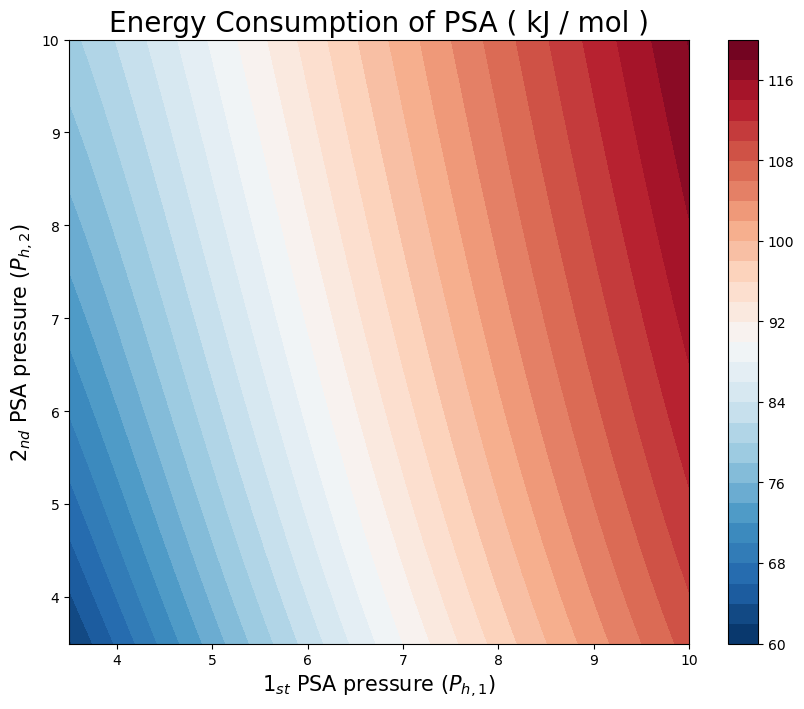

In [94]:
## INTO Array
E_per_n_arr = np.array(E_per_n_2d)
x_prod_arr = np.array(x_prod_2d)

## Graph
fig1,ax1 = plt.subplots(figsize = [10,8],dpi = 100)
ctr1 = ax1.contourf(P_ran_1,P_ran_2,E_per_n_arr.T/1000,levels = 30,cmap="RdBu_r")
fig1.colorbar(ctr1,ax=ax1)
#ax1.plot(p1_sort, p2_sort,'b-.',lw = 2.8 )
#ax1.text(6.5,7.4,'Recovery = 70%',
#         fontdict = {'size':12,'color': 'blue','weight':'bold'})
ax1.set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 15)
ax1.set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 15)
ax1.set_title('Energy Consumption of PSA ( kJ / mol )',fontsize = 20)
## x and y axis
#ax1.set_xlim(4.5,12.5)
#ax1.set_ylim(4.5,12.5)
#ax1.set_xticks([5,6,7,8,9,10,11,12])
#ax1.set_yticks([5,6,7,8,9,10,11,12])
#fig1.show()

fig1.savefig('E_cas_PSA.png')

## SF6 purity

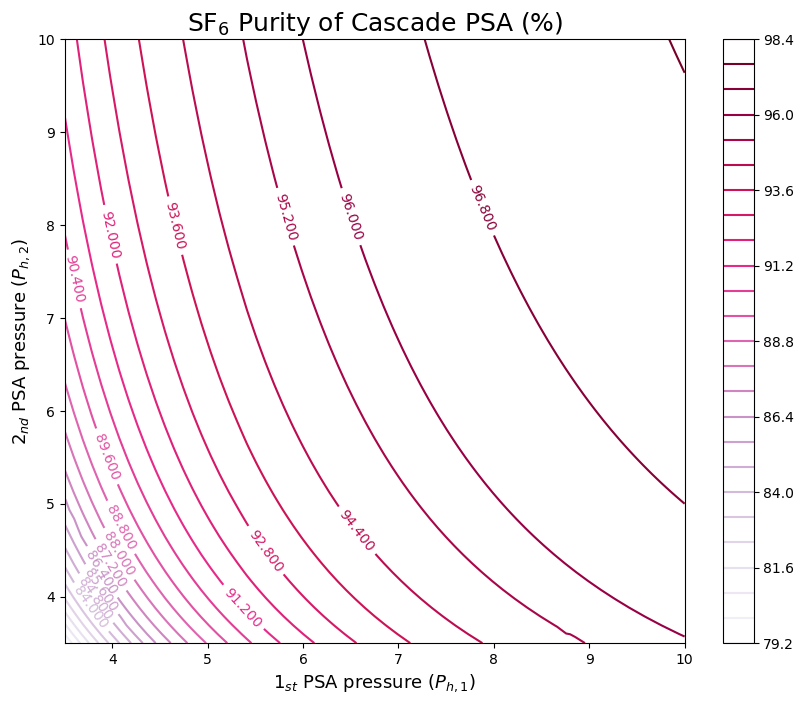

In [95]:
### INTO Array ###
x_prod_arr = np.array(x_prod_2d)

fig2,ax2 = plt.subplots(figsize = [10,8],dpi = 100)
ctr2 = ax2.contour(P_ran_1,P_ran_2,x_prod_arr.T*100,levels = 25,cmap="PuRd")
#ctr2 = ax2.contour(Ph1_arr,Ph2_arr,Rec_res_arr,levels = 25,colors= 'k')
fig2.colorbar(ctr2,ax = ax2)

ax2.clabel(ctr2)

ax2.set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 13)
ax2.set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 13)
ax2.set_title('SF$_6$ Purity of Cascade PSA (%)',fontsize = 18)
## x and y axis
#ax2.set_xlim(2,5)
#ax2.set_ylim(2,5)
#ax2.set_xticks([5,6,7,8,9,10,11,12])
#ax2.set_yticks([5,6,7,8,9,10,11,12])  
#fig2.show()
cooo = "copyri" + "ght"
print("The "+cooo + " of all the codes belongs to")
print("D",end="r.")
print("S.E.O.N", end=".G.B.I.N\n")
print("G.",end = "A.")

fig2.savefig('Purity_cas_PSA.png')

# Sensitivity Analysis for Cascade PSA

## Purities at $P_{h,1} = 5$ bar

In [96]:
P_h1_fix = 5
P_h2_ran = np.linspace(2.2,10)
P_low_interm = 1
P_feed2 = 1
T_tri2 = [298,]*2
y_feed2 = [0.1,0.9]
T_feed2 = 313


xx_sensi_result = []

for binn,dH,nam in zip(bins_CO2,dH_CO2,Names_CO2):
    print(nam)
    xx_list_tmp = []
    for pp in P_h2_ran:
        try:
            xg1 = 0.3
            xg2 = 0.7
            E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                              binn,dH,T_tri2,
                              y_feed2, T_feed2,xg1,xg2)
        except:
            try:
                xg1 = 0.25
                xg2 = 0.75
                E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                  binn,dH,T_tri2,
                                  y_feed2, T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.15
                    xg2 = 0.85
                    E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                      binn,dH,T_tri2,
                                      y_feed2, T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.1
                        xg2 = 0.90
                        E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                          binn,dH,T_tri2,
                                          y_feed2, T_feed2,xg1,xg2)
                    except:
                        try:
                            xg1 = 0.7
                            xg2 = 0.3
                            E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                          binn,dH,T_tri2,
                                          y_feed2, T_feed2,xg1,xg2)
                        except:
                            try:
                                xg1 = 0.8
                                xg2 = 0.2
                                E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                          binn,dH,T_tri2,
                                          y_feed2, T_feed2,xg1,xg2)
                            except:
                                try:
                                    xg1 = 0.9999999999
                                    xg2 = 0.0000000001
                                    E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                          binn,dH,T_tri2,
                                          y_feed2, T_feed2,xg1,xg2)
                                except:
                                    xg1 = 0.0000000001
                                    xg2 = 0.9999999999
                                    E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                          binn,dH,T_tri2,
                                          y_feed2, T_feed2,xg1,xg2)
                      
                        

        xx_list_tmp.append(x_tmp)
    xx_sensi_result.append(xx_list_tmp)
        

zeolite-13x
HKUST-1a


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


UiO-67
UiO-66
MIL-100(Fe)
UiO-67_(sim)
HKUST-1_(sim)
HKUST-1_(PB)
zeolite-13x_(sim)
UiO-66_(sim)
MIL-100(Fe)_(sim)


## Graph: Cascade purity for diff. $P_{h,1}$ 

In [97]:
print(Names_CO2)

['zeolite-13x', 'HKUST-1a', 'UiO-67', 'UiO-66', 'MIL-100(Fe)', 'UiO-67_(sim)', 'HKUST-1_(sim)', 'HKUST-1_(PB)', 'zeolite-13x_(sim)', 'UiO-66_(sim)', 'MIL-100(Fe)_(sim)']


In [98]:
print(arg_sort)


[ 1  2  5  7  4  6  3  8 10  0  9]


In [99]:
print(xx_sensi_result)

[[array([0.47913116]), array([0.49460346]), array([0.50817917]), array([0.52027593]), array([0.53107615]), array([0.54045843]), array([0.54882402]), array([0.55653443]), array([0.56318225]), array([0.56914007]), array([0.5744891]), array([0.57963508]), array([0.58394954]), array([0.58784577]), array([0.59136994]), array([0.59456236]), array([0.59745829]), array([0.60008858]), array([0.60248031]), array([0.60465726]), array([0.60664041]), array([0.60888222]), array([0.6105205]), array([0.61201557]), array([0.61338025]), array([0.614626]), array([0.61576304]), array([0.61680056]), array([0.61774681]), array([0.6186092]), array([0.61939445]), array([0.6201086]), array([0.62075715]), array([0.62134507]), array([0.6218769]), array([0.62235675]), array([0.62278839]), array([0.62317526]), array([0.6235205]), array([0.623827]), array([0.6240974]), array([0.62433414]), array([0.62453947]), array([0.62471544]), array([0.62486397]), array([0.62498681]), array([0.62508561]), array([0.62516186]), a

In [100]:
print(xx_res_arr)

[[0.47913116 0.50354556 0.52338855 0.53977435 0.55339778 0.5644578
  0.57370284 0.58179241 0.58831748 0.59385317 0.5985679  0.60259698
  0.60604969 0.60944508 0.61197891 0.61416026 0.61603822 0.61765373
  0.61904121 0.62022969 0.62124381 0.62210459 0.62283008 0.62343578
  0.62393513 0.62433979 0.62465992 0.62490442 0.6250811  0.62519684
  0.62525771 0.6252691  0.6252358  0.62516207 0.62505172 0.62490816
  0.62473445 0.62453334 0.6243073  0.62405859 0.62378921 0.62350101
  0.62319564 0.62287463 0.62253933 0.62219102 0.62183083 0.62145982
  0.62107893 0.62068905]
 [0.87811858 0.94182431 0.97090904 0.98104285 0.98540121 0.98764347
  0.98894915 0.9897768  0.99033414 0.99072667 0.99101284 0.99122726
  0.99139154 0.99151975 0.99162141 0.9917031  0.99176953 0.99182411
  0.99186936 0.9919072  0.99193907 0.9919661  0.99198918 0.99200898
  0.99202607 0.99204088 0.99205379 0.99206508 0.992075   0.99208371
  0.99209148 0.99209835 0.99210446 0.99210992 0.99211482 0.99211921
  0.99212317 0.99212674 

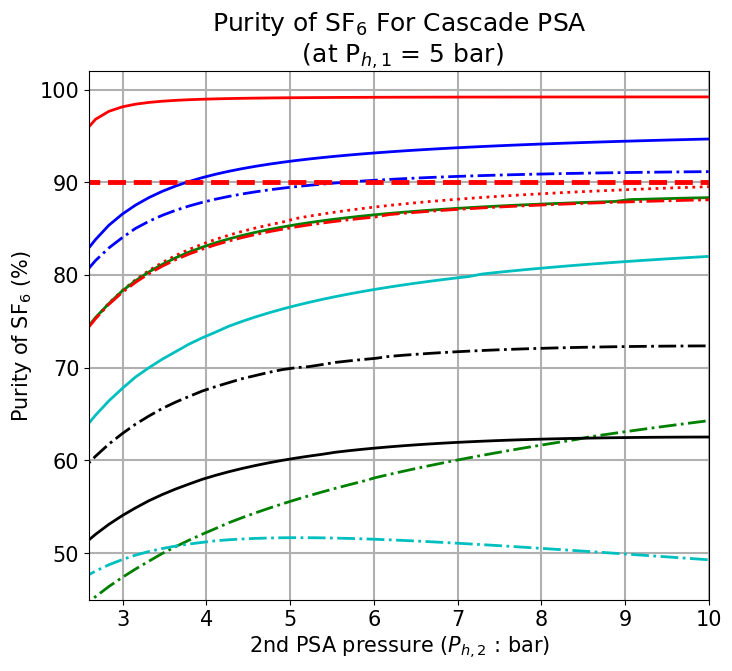

In [107]:
xx_res_arr = np.reshape(xx_sensi_result,[len(Names_CO2),-1])

ii = 0
plt.figure(figsize= [8,7],dpi = 100)
label_list =['zeolite-13x', 'HKUST-1a', 'UiO-67', 'UiO-66',  'MIL-100(Fe)',
             'UiO-67_(sim)', 'HKUST-1_(sim)','HKUST-1_(PB)', 'zeolite-13x_(sim)'
             ,  'UiO-66_(sim)', 'MIL-100(Fe)_(sim)']

lcolor = ['k','r','b','c','g','b','r','r','k','c','g']
lls=['-','-','-','-','-','dashdot','dashdot','dotted','dashdot','dashdot','dashdot']
arg_sort = np.argsort(xx_res_arr[:,-1])[::-1]
for i in arg_sort:
    plt.plot(P_h2_ran, xx_res_arr[i]*100,
             color = lcolor[i],ls=lls[i],
             linewidth = 2,
             #label = Names_CO2[i])
             label = label_list[i])
             
plt.plot([np.min(P_h2_ran),10],[90,90],ls='--',lw='3.5',color='r')
plt.grid(which = 'major',ls ='-',linewidth = 1.5)
#plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)

plt.xlabel('2nd PSA pressure ($P_{h,2}$ : bar)',fontsize = 15)
plt.ylabel('Purity of SF$_6$ (%)',fontsize= 15)
plt.xlim([2.6,10])
plt.ylim([45,102])
plt.xticks( np.arange(3,11,step = 1),fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize = 14)

#plt.legend(fontsize = 14,loc = (1.02,0.08))

plt.title('Purity of SF$_6$ For Cascade PSA \n (at P$_{h,1}$ = 5 bar)',fontsize = 18)
plt.savefig('Recovery_vacuu_1vs9_full.png')


## Save above data

In [108]:
print(np.reshape(P_h2_ran,[-1,1]).shape)
print(xx_res_arr.shape)

(50, 1)
(11, 50)


In [109]:
save_7_2_graph = np.concatenate((np.reshape(P_h2_ran,[-1,1]), xx_res_arr.T),1)
save_7_2_graph_pd = pd.DataFrame(save_7_2_graph).to_excel('SecNum_7_2_single_purity.xlsx')

# Maximum Purity of Cascade PSA

## All purity for diff. adsorbenets

In [110]:
Ph1_test= np.linspace(3.5,10,11*4+2)
Ph2_test= np.linspace(3.5,10,11*4+2)
x_max_list = []

P_low_interm = 1
P_feed2 = 1
T_tri2 = [298,]*2
y_feed2 = [0.1,0.9]
T_feed2 = 313

for binn,nam,dH in zip(bins_CO2,Names_CO2,dH_CO2):
    x_all_list = []
    print(nam)
    for pp1 in Ph1_test:
        for pp2 in Ph2_test:
            try:
                xg1 = 0.3
                xg2 = 0.7
                E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                   binn,dH,T_tri2,
                                   y_feed2, T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.4
                    xg2 = 0.75
                    E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                       binn,dH,T_tri2,
                                       y_feed2, T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.4
                        xg2 = 0.85
                        E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                           binn,dH,T_tri2,
                                           y_feed2, T_feed2,xg1,xg2)
                    except:
                        try:
                            xg1 = 0.7
                            xg2 = 0.90
                            E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                               binn,dH,T_tri2,
                                               y_feed2, T_feed2,xg1,xg2)
                        except:
                            xg1 = 0.8
                            xg2 = 0.98
                            E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                               binn,dH,T_tri2,
                                               y_feed2, T_feed2,xg1,xg2)
            x_all_list.append(x_tmp)
    x_max_list.append(np.max(x_all_list))
            


zeolite-13x
HKUST-1a


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


UiO-67
UiO-66
MIL-100(Fe)
UiO-67_(sim)
HKUST-1_(sim)
HKUST-1_(PB)
zeolite-13x_(sim)
UiO-66_(sim)
MIL-100(Fe)_(sim)


## Sorting the results

In [111]:
arg_xmax=  np.argsort(x_max_list)[::-1]
xx_xmax = np.array(x_max_list)[arg_xmax]
Names_xx = np.array(Names_CO2)[arg_xmax]
dH_xx = dH_CO2[arg_xmax]
bin_xx = np.array(bins_CO2)[arg_xmax]

xx_xmax[0] = 0.99633181287

for ii in range(len(Names_xx)):
    print(Names_xx[ii], ': ', xx_xmax[ii] )
xx_xmax_single = []
for x_single in xx_list_set:
    xmax_tmpp = np.max(x_single)
    xx_xmax_single.append(xmax_tmpp)
xx_xmax_single_sort = np.array(xx_xmax_single)[arg_xmax]

HKUST-1a :  0.99633181287
UiO-67 :  0.9756333392712951
UiO-67_(sim) :  0.9488586247235121
HKUST-1_(PB) :  0.9400094890246109
MIL-100(Fe) :  0.9293830115910471
HKUST-1_(sim) :  0.9278103334225054
UiO-66 :  0.883217374500761
zeolite-13x_(sim) :  0.779335085695117
MIL-100(Fe)_(sim) :  0.7254697626994799
zeolite-13x :  0.6730684385899348
UiO-66_(sim) :  0.5338078927039285


# Bar Graph: Cascade Maximum Purity

In [112]:
## SINGLE PSA ###
print('Single PSA Maximum Purity')
for indd in range(len(xx_xmax_single_sort)):
    print('{0:15s} : {1:8.4f} %'.format(Names_xx[indd],xx_xmax_single_sort[indd]*100))
    
print(xx_xmax)

Single PSA Maximum Purity
HKUST-1a        :  80.3912 %
UiO-67          :  58.8354 %
UiO-67_(sim)    :  56.0280 %
HKUST-1_(PB)    :  51.0731 %
MIL-100(Fe)     :  50.7750 %
HKUST-1_(sim)   :  50.6613 %
UiO-66          :  43.3471 %
zeolite-13x_(sim) :  38.7178 %
MIL-100(Fe)_(sim) :  32.2017 %
zeolite-13x     :  33.0469 %
UiO-66_(sim)    :  29.2008 %
[0.99633181 0.97563334 0.94885862 0.94000949 0.92938301 0.92781033
 0.88321737 0.77933509 0.72546976 0.67306844 0.53380789]


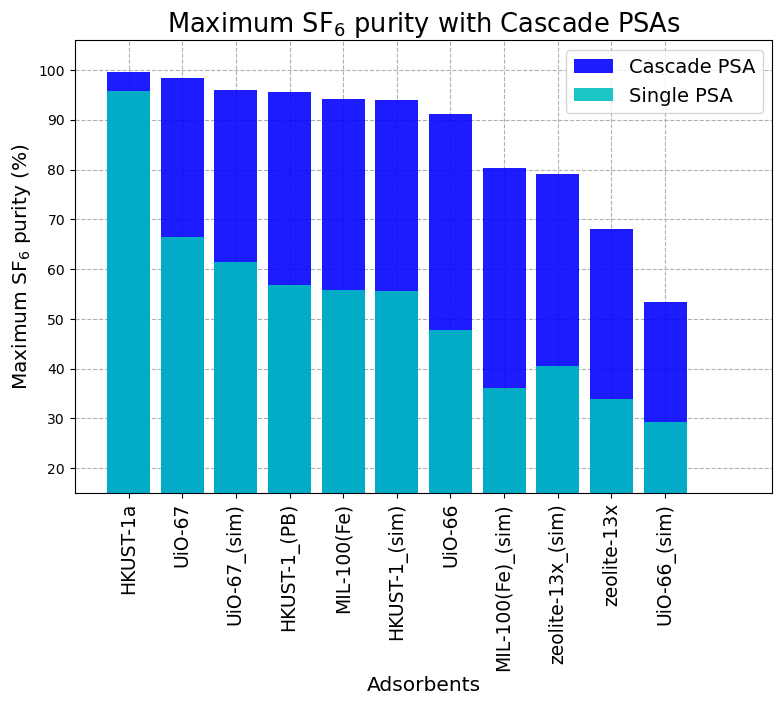

In [42]:
fig_m, ax_m = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(linestyle  = '--')
ax_m.set_axisbelow(True)

cc = 0
for xx in xx_xmax:
    if xx < 0.9:
        N90 = cc
        break
    cc = cc + 1

bar1 = ax_m.bar(np.arange(len(xx_xmax)),xx_xmax*100,
              color = 'b', alpha = 0.89,
              label = 'Cascade PSA')
bar2 = ax_m.bar(np.arange(len(xx_xmax_single_sort)),xx_xmax_single_sort*100,
               color = 'c', alpha = 0.89,
               label = 'Single PSA')
#bar_90p = ax_m.bar(N90, 90, color = 'r',
#                label = '90% purity')
ax_m.set_ylabel('Maximum SF$_6$ purity (%)',fontsize = 14.5)
ax_m.set_xlabel('Adsorbents',fontsize = 14.5)

ax_m.set_title('Maximum SF$_6$ purity with Cascade PSAs',fontsize = 18.5)
ax_m.set_yticks([20,30,40,50,60,70,80,90,100])
ax_m.set_yticklabels([20,30,40,50,60,70,80,90,100])

ax_m.set_xticks(np.arange(len(Names_xx)))
ax_m.set_xticklabels(Names_xx,fontsize = 13.5, rotation = 90)


ax_m.set_xlim([-1,len(xx_list_set)+1])
ax_m.set_ylim([15,106])
ax_m.set_xticks(np.arange(0,len(xx_xmax)))
frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
plt.legend(fontsize = 14)
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

In [113]:
Over90 = xx_xmax[xx_xmax> 0.9]
print(len(Over90))
print(Names_xx[0:5])


6
['HKUST-1a' 'UiO-67' 'UiO-67_(sim)' 'HKUST-1_(PB)' 'MIL-100(Fe)']


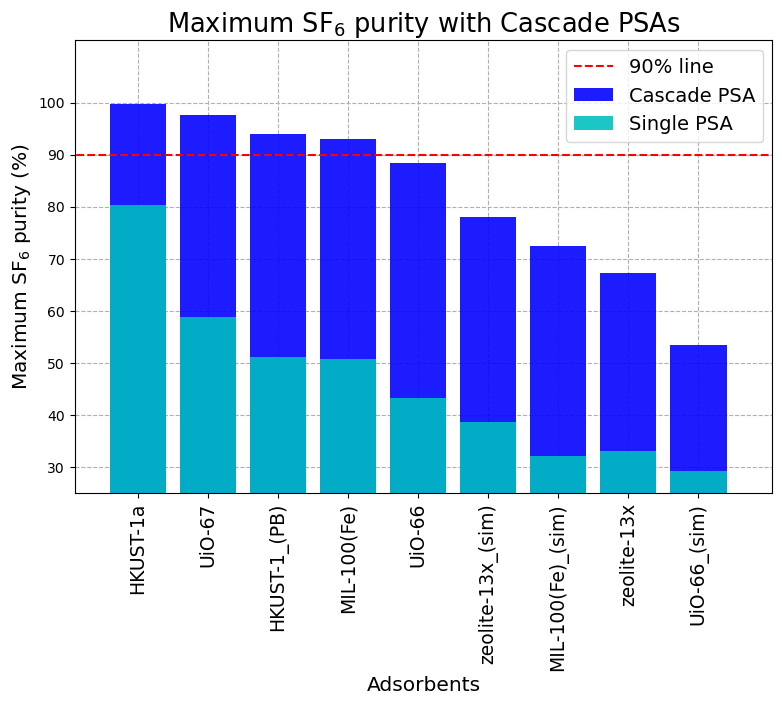

In [114]:
Names_refined  = np.array(label_list)[arg_xmax]


fig_m2, ax_m2 = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(linestyle  = '--')
ax_m2.set_axisbelow(True)

cc = 0
for xx in xx_xmax:
    if xx < 0.9:
        N90 = cc
        break
    cc = cc + 1

    
baronoff = [True,]*len(xx_xmax)
baronoff[2] = False
baronoff[5] = False

bar1 = ax_m2.bar(np.arange(len(xx_xmax)-2),xx_xmax[baronoff]*100,
              color = 'b', alpha = 0.89, 
              label = 'Cascade PSA')
bar2 = ax_m2.bar(np.arange(len(xx_xmax_single_sort)-2),xx_xmax_single_sort[baronoff]*100,
               color = 'c', alpha = 0.89,
               label = 'Single PSA')

line_90p = ax_m2.plot([-5,len(x_max_list)*1.01], [90,90], 'r--',
                label = '90% line',lw = 1.5)
#bar_90p = ax_m2.bar(N90, 90, color = 'r')

ax_m2.set_ylabel('Maximum SF$_6$ purity (%)',fontsize = 14.5)
ax_m2.set_xlabel('Adsorbents',fontsize = 14.5)
ax_m2.set_title('Maximum SF$_6$ purity with Cascade PSAs',fontsize = 18.5)
ax_m2.set_yticks([20,30,40,50,60,70,80,90,100])
ax_m2.set_yticklabels([20,30,40,50,60,70,80,90,100])

ax_m2.set_xticks(np.arange(len(Names_xx)-2))
#ax_m2.set_xticklabels(Names_xx,fontsize = 13.5, rotation = 90)
ax_m2.set_xticklabels(Names_refined[baronoff],fontsize = 13.5, rotation = 90)

ax_m2.set_xlim([-0.9,len(x_max_list)*1.005-2])
ax_m2.set_ylim([25,112])

#ax_m2.set

frame1 = plt.gca()
## NO x-axis ticks and labels ##
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)
#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
    
plt.legend(fontsize = 14)
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

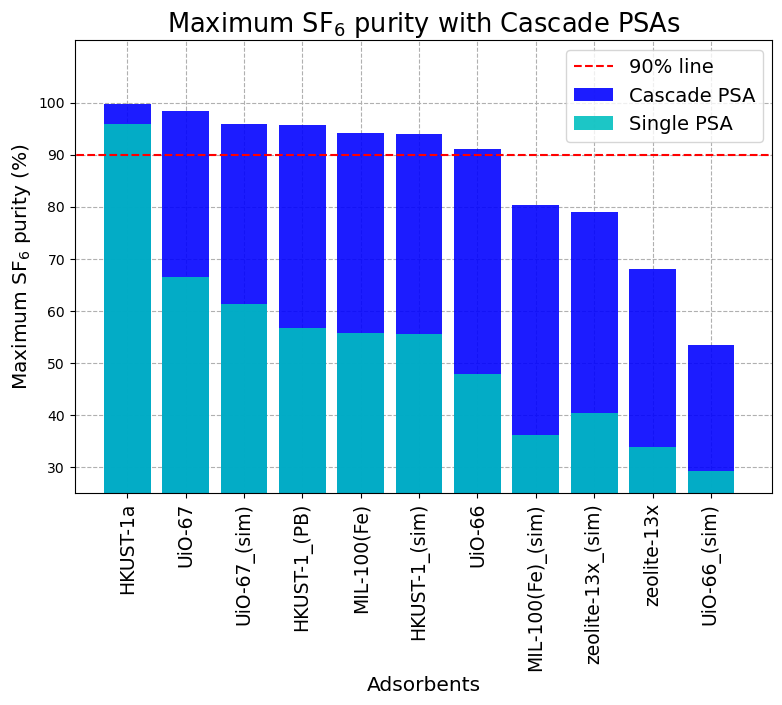

In [45]:
Names_refined  = np.array(label_list)[arg_xmax]


fig_m2, ax_m2 = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(linestyle  = '--')
ax_m2.set_axisbelow(True)

cc = 0
for xx in xx_xmax:
    if xx < 0.9:
        N90 = cc
        break
    cc = cc + 1

bar1 = ax_m2.bar(np.arange(len(xx_xmax)),xx_xmax*100,
              color = 'b', alpha = 0.89, 
              label = 'Cascade PSA')
bar2 = ax_m2.bar(np.arange(len(xx_xmax_single_sort)),xx_xmax_single_sort*100,
               color = 'c', alpha = 0.89,
               label = 'Single PSA')

line_90p = ax_m2.plot([-5,len(x_max_list)*1.01], [90,90], 'r--',
                label = '90% line',lw = 1.5)
#bar_90p = ax_m2.bar(N90, 90, color = 'r')

ax_m2.set_ylabel('Maximum SF$_6$ purity (%)',fontsize = 14.5)
ax_m2.set_xlabel('Adsorbents',fontsize = 14.5)
ax_m2.set_title('Maximum SF$_6$ purity with Cascade PSAs',fontsize = 18.5)
ax_m2.set_yticks([20,30,40,50,60,70,80,90,100])
ax_m2.set_yticklabels([20,30,40,50,60,70,80,90,100])

ax_m2.set_xticks(np.arange(len(Names_xx)))
#ax_m2.set_xticklabels(Names_xx,fontsize = 13.5, rotation = 90)
ax_m2.set_xticklabels(Names_refined,fontsize = 13.5, rotation = 90)

ax_m2.set_xlim([-0.9,len(x_max_list)*1.005])
ax_m2.set_ylim([25,112])

#ax_m2.set

frame1 = plt.gca()
## NO x-axis ticks and labels ##
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)
#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
    
plt.legend(fontsize = 14)
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

In [115]:
print('Cascade PSA')
print('{0:8s}  :'.format('Ads. Name'), ' {0:23s}'.format('SF6 Purity (%)') )
for i in range(len(Names_xx)):
    print('{0:14s}  :'.format(Names_xx[i]), '{0:9.5f}'.format(xx_xmax[i]*100))



Cascade PSA
Ads. Name  :  SF6 Purity (%)         
HKUST-1a        :  99.63318
UiO-67          :  97.56333
UiO-67_(sim)    :  94.88586
HKUST-1_(PB)    :  94.00095
MIL-100(Fe)     :  92.93830
HKUST-1_(sim)   :  92.78103
UiO-66          :  88.32174
zeolite-13x_(sim)  :  77.93351
MIL-100(Fe)_(sim)  :  72.54698
zeolite-13x     :  67.30684
UiO-66_(sim)    :  53.38079


In [116]:
print('Single PSA')
print('{0:8s}  :'.format('Ads. Name'),' {0:23s}'.format('SF6 Purity (%)') )
for i in range(len(Names_xx)):
    print('{0:14s}  :'.format(Names_xx[i]), '{0:9.5f}'.format(xx_xmax_single_sort[i]*100))

Single PSA
Ads. Name  :  SF6 Purity (%)         
HKUST-1a        :  80.39118
UiO-67          :  58.83543
UiO-67_(sim)    :  56.02804
HKUST-1_(PB)    :  51.07312
MIL-100(Fe)     :  50.77499
HKUST-1_(sim)   :  50.66126
UiO-66          :  43.34708
zeolite-13x_(sim)  :  38.71778
MIL-100(Fe)_(sim)  :  32.20168
zeolite-13x     :  33.04693
UiO-66_(sim)    :  29.20081


## Screening based on $x_{max}$

### (Names_xcut, bins_xcut,dH_xcut)

In [117]:
### Cutting based on the maximum purity of cascade PSA processs
arg_xcut = xx_xmax>0.9

Names_xcut = Names_xx[arg_xcut]
bins_xcut = np.array(bin_xx)[arg_xcut]
dH_xcut = np.array(dH_xx)[arg_xcut]

xx_screen = xx_xmax[arg_xcut]
arg_cut_sort = np.argsort(xx_screen)[::-1]
xx_screen_sort = xx_screen[arg_cut_sort]
Names_screen_sort = Names_xcut[arg_cut_sort]
Names_screen_sort_str = []

print('{0:8s}  :'.format('Ads. Name'), ' {0:23s}'.format('SF6 Purity (%)') )
for (namm, binn, xxxx) in zip(Names_screen_sort,bins_xcut, xx_screen_sort):
    print('{0:14s}  :'.format(namm), '{0:9.3f} %'.format(xxxx*100))



Ads. Name  :  SF6 Purity (%)         
HKUST-1a        :    99.633 %
UiO-67          :    97.563 %
UiO-67_(sim)    :    94.886 %
HKUST-1_(PB)    :    94.001 %
MIL-100(Fe)     :    92.938 %
HKUST-1_(sim)   :    92.781 %


# Bar Graph: Screened Purity

## Purity Screening

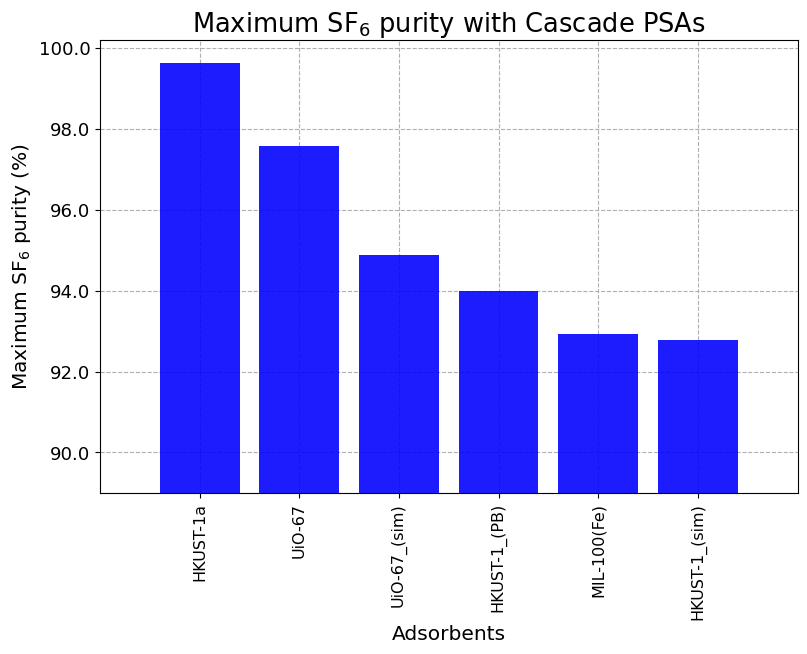

In [118]:
Names_screen_sort_str = []
for NNam in Names_screen_sort:
    Names_screen_sort_str.append(str(NNam))

fig_s, ax_s = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_s.set_axisbelow(True)

bar1 = ax_s.bar(np.arange(len(xx_screen_sort)),xx_screen_sort*100,
              color = 'b', alpha = 0.89,
              label = 'Adsorbents (Above 90% purity)')
ax_s.set_ylabel('Maximum SF$_6$ purity (%)',fontsize = 14.5)
ax_s.set_xlabel('Adsorbents',fontsize = 14.5)

ax_s.set_title('Maximum SF$_6$ purity with Cascade PSAs',fontsize = 18.5)
ax_s.set_xticks(np.arange(len(Names_screen_sort)))
ax_s.set_xticklabels(Names_screen_sort_str,rotation = 90,fontsize = 11.5)

ax_s.set_ylim([89,100.2])
yticklab = ax_s.get_yticks()
ax_s.set_yticklabels(yticklab, fontsize = 13)

ax_s.set_xlim([-1,len(xx_screen_sort)])
#ax_m.set_xticks(np.arange(0,len(xx_xmax)))
   
#plt.legend(fontsize = 14)
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

## Save above data

In [119]:
x_sav = np.reshape(xx_screen_sort,[-1,1])
Nam_sav = np.reshape(Names_screen_sort,[-1,1])

In [120]:
Mat2save = np.concatenate((Nam_sav,x_sav))
save_10_1_graph = np.concatenate((np.reshape(P_h2_ran,[-1,1]), xx_res_arr.T),1)
save_10_1_graph_pd = pd.DataFrame(Mat2save).to_excel('SecNum_10_1_xmax_Casc.xlsx')

# Functions for Optimization

## objPSA2(): Objective function

In [121]:
def objPSA2(P_high1, P_high2, P_low, P_feed,
           iso_input,dH_input, Tref_input,
           yfeed1,Tfeed):
    try:
        xgue1= 0.3
        xgue2 = 0.7
        E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                           iso_input,dH_input,Tref_input,
                           yfeed1,Tfeed,xgue1,xgue2)
    except:
        try:
            xgue1 = 0.4
            xgue2 = 0.75
            E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                               iso_input,dH_input,Tref_input,
                               yfeed1,Tfeed,xgue1,xgue2)
        except:
            try:
                xgue1 = 0.4
                xgue2 = 0.85
                E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                   iso_input,dH_input,Tref_input,
                                   yfeed1,Tfeed,xgue1,xgue2)
            except:
                try:
                    xgue1 = 0.7
                    xgue2 = 0.9
                    E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                       iso_input,dH_input,Tref_input,
                                       yfeed1,Tfeed,xgue1,xgue2)
                except:
                    xgue1 = 0.8
                    xgue2 = 0.98
                    E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                       iso_input,dH_input,Tref_input,
                                       yfeed1,Tfeed,xgue1,xgue2)
    return E_tmp

## consx(): Constraints

In [122]:
def consPSA2(P_high1, P_high2, P_low, P_feed,
             iso_input,dH_input, Tref_input,
             yfeed1,Tfeed):
    try:
        xgue1= 0.3
        xgue2 = 0.7
        E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                           iso_input,dH_input,Tref_input,
                           yfeed1,Tfeed,xgue1,xgue2)
    except:
        try:
            xgue1 = 0.4
            xgue2 = 0.75
            E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                               iso_input,dH_input,Tref_input,
                               yfeed1,Tfeed,xgue1,xgue2)
        except:
            try:
                xgue1 = 0.4
                xgue2 = 0.85
                E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                   iso_input,dH_input,Tref_input,
                                   yfeed1,Tfeed,xgue1,xgue2)
            except:
                try:
                    xgue1 = 0.7
                    xgue2 = 0.9
                    E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                       iso_input,dH_input,Tref_input,
                                       yfeed1,Tfeed,xgue1,xgue2)
                except:
                    xgue1 = 0.8
                    xgue2 = 0.98
                    E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                       iso_input,dH_input,Tref_input,
                                       yfeed1,Tfeed,xgue1,xgue2)
    return x_tmp

## Optim. Formulation (For a single Adsorbent)

In [123]:
#ind_ad = 72
def obj_tmp(PPPP):
    ## Adsorbent conditions
    iso_tmp = bins_CO2[ind_ad]
    dH_tmp = dH_CO2[ind_ad]
    Name_tmp = Name_lilst[ind_ad]
    Tref_tmp = [298, 298]
    
    ## Situation conditions
    Pfeed_tmp = 1
    P_low_inter_tmp = 1
    yfeed_tmp = [0.1,  0.9]
    Tfeed_tmp = 313    
        
    EE_tmp, xx_tmp = objPSA2(PPPP[0], PPPP[1],P_low_inter_tmp, Pfeed_tmp,
                             iso_tmp, dH_tmp, Tref_tmp,
                             yfeed_tmp,Tfeed_tmp)
    return E_tmp
    

In [124]:
#ind_ad = 72
#P_l_bound = [3.5, 3.5]
def cons_tmp(PPPP):
    ## Adsorbent conditions
    iso_tmp = bins_CO2[ind_ad]
    dH_tmp = dH_CO2[ind_ad]
    Name_tmp = Name_lilst[ind_ad]
    Tref_tmp = [298, 298]
    
    ## Situation conditions
    Pfeed_tmp = 1
    P_low_inter_tmp = 1
    yfeed_tmp = [0.1,  0.9]
    Tfeed_tmp = 313    
        
    EE_tmp, xx_tmp = objPSA2(PPPP[0], PPPP[1],P_low_inter_tmp, Pfeed_tmp,
                             iso_tmp, dH_tmp, Tref_tmp,
                             yfeed_tmp,Tfeed_tmp)
    return xx_tmp-0.9


In [125]:
P_l_bound = [3.5, 3.5]
def optim_form(iso_in,dH_in,Tref_in,
              yfeed_in, Tfeed_in, Pfeed_in, Plow_in):
    def obj_tmppp(PPPP):
        mag = 1
#        turnon = 0
        if PPPP[0] < P_l_bound[0] or PPPP[1] < P_l_bound[1]:
            mag = 1+100*np.sum((np.array(PPPP) - np.array(P_l_bound[0]))**2)
            PP_re = P_l_bound
            turnon = 1
        else:
            PP_re = PPPP
        EE_tmp = objPSA2(PP_re[0], PP_re[1],Plow_in, Pfeed_in,
                                 iso_in, dH_in, Tref_in,
                                 yfeed_in,Tfeed_in)
#        if turnon > 0:
#            print(mag)
        return mag*EE_tmp/1E3  # in kJ/mol
    def const_tmppp(PPPP):
        mag = 1
        if PPPP[0] < P_l_bound[0] or PPPP[1] < P_l_bound[1]:
            PP_re = P_l_bound
            mag = 1+ 100*np.sum((np.array(PPPP)-np.array(P_l_bound))**2)
            print(mag)
        else:
            PP_re = PPPP
        xx_tmp = consPSA2(PP_re[0], PP_re[1],Plow_in, Pfeed_in,
                          iso_in, dH_in, Tref_in,
                          yfeed_in,Tfeed_in)
        return mag*(xx_tmp-0.9)*5000
    return [obj_tmppp,const_tmppp]
nnn = 3
obj_ad_tmp, const_ad_tmp = optim_form(bin_xx[nnn], dH_xx[nnn], [289,289],
                                      [0.1,0.9], 313,1,1)  

In [126]:
### TEST ###
print(obj_ad_tmp([8,8]))
print(const_ad_tmp([10,10]))

[112.46651665]
[160.74635785]


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


In [127]:
x00_tmp = [5,5]

opt_res_tmp = optim.minimize(obj_ad_tmp, x00_tmp, method = 'COBYLA',
                             constraints = {'type':'ineq','fun':const_ad_tmp},bounds=[3.2,20])
print(opt_res_tmp) ### in kJ/mol
#print(const_ad_tmp(opt_res_tmp.x))
xxx_opt = consPSA2(opt_res_tmp.x[0], opt_res_tmp.x[1],1, 1,
                   bin_xx[nnn], dH_xx[nnn], [298,298],
                   [0.1,0.9],313)
print(xxx_opt)
print(obj_ad_tmp(opt_res_tmp.x))


C:\Users\LeBlanc\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:539: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


     fun: 101.24023495347613
   maxcv: 3.1117164400740194e-07
 message: 'Optimization terminated successfully.'
    nfev: 42
  status: 1
 success: True
       x: array([6.1659588 , 8.62385008])
[0.91020455]
[101.24023495]


## Optim for various ads.

In [129]:
E_consu_list = []
P_opt_list = []
xx_opt_list = []
for binn,dHH,Namm in zip(bins_xcut,dH_xcut, Names_xcut):
    print(Namm)
    ## Reference Temperature
    Tref_tmp = [298,298]
    ## Feed Conditions 
    Pfeed_tmp = 1
    yfeed_tmp = [0.1,0.9]
    Tfeed_tmp = 313
    
    ## Intermediate pressure
    Plow_tmp = 1
    objj, constt= optim_form(binn,dHH,Tref_tmp,
                             yfeed_tmp, Tfeed_tmp, Pfeed_tmp, Plow_tmp)
    x00_tmp = [10,10]
    opt_res_tmp = optim.minimize(objj, x00_tmp, method = 'COBYLA',
                                 constraints = {'type':'ineq','fun':constt},bounds=[3.5,10])
    P12_sol = opt_res_tmp.x
    print(P12_sol)
    E_consu = objPSA2(P12_sol[0], P12_sol[1],Plow_tmp, Pfeed_tmp,
                      binn, dHH, Tref_tmp,
                      yfeed_tmp,Tfeed_tmp)
    xx_opt = consPSA2(P12_sol[0], P12_sol[1],Plow_tmp, Pfeed_tmp,
                      binn, dHH, Tref_tmp,
                      yfeed_tmp,Tfeed_tmp)
    E_consu_list.append(E_consu)
    P_opt_list.append(P12_sol)
    xx_opt_list.append(xx_opt*100)
    print('Energy Consumption: {} kJ/mol'.format(E_consu/1000))    

HKUST-1a


C:\Users\LeBlanc\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:539: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


3370.0590523347914
2671.561322840647
2115.4664927374934
2031.8583494160832
1997.1321021716408
1969.248573454013
1923.9224143667673
1892.88054511126
1889.7695261033205
1891.170903243917
1891.5213847835707
1892.258821287006
1891.6389584579574
1891.761279597087
[3.49995744 7.84828849]
Energy Consumption: [79.22162425] kJ/mol
UiO-67
3662.727304494698
2818.0404382702723
2862.740300841748
2728.4145123471744
2770.0194185328837
2738.7011403170036
2749.770266421825
2742.055437309648
2742.0506313649385
2740.127759300678
2740.4793571408486
2739.9993245226888
2740.0873212774804
2739.967356151023
2739.9832705145304
[3.4999169  8.73352966]
Energy Consumption: [80.46274574] kJ/mol
UiO-67_(sim)
2925.639926139308
[5.00273462 5.64143572]
Energy Consumption: [84.60835755] kJ/mol
HKUST-1_(PB)
[5.66703416 7.8732547 ]
Energy Consumption: [95.92975483] kJ/mol
MIL-100(Fe)
[6.42372288 7.36400686]
Energy Consumption: [100.32268188] kJ/mol
HKUST-1_(sim)
[6.56265438 7.50278162]
Energy Consumption: [101.55418395] 

In [130]:
print(E_consu_list)

[array([79221.62424984]), array([80462.74573853]), array([84608.35754816]), array([95929.75482817]), array([100322.68188289]), array([101554.18394862])]


In [131]:
for nn,ee in zip(Names_xcut, E_consu_list):
    print('{0:15s} :  {1:8.4f} MJ/SF6 kg'.format(nn,ee[0]))

HKUST-1a        :  79221.6242 MJ/SF6 kg
UiO-67          :  80462.7457 MJ/SF6 kg
UiO-67_(sim)    :  84608.3575 MJ/SF6 kg
HKUST-1_(PB)    :  95929.7548 MJ/SF6 kg
MIL-100(Fe)     :  100322.6819 MJ/SF6 kg
HKUST-1_(sim)   :  101554.1839 MJ/SF6 kg


# Bar Graph: Optimized Energy

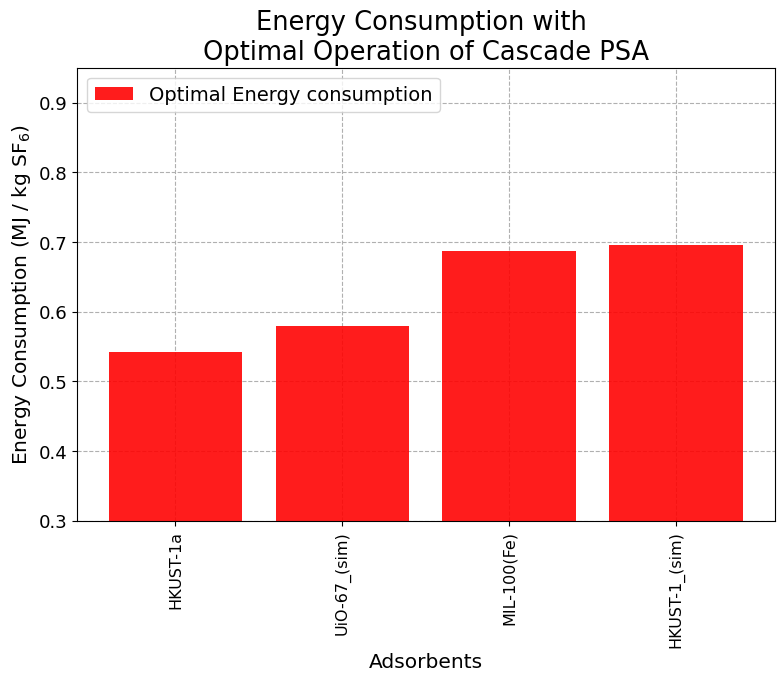

In [132]:
E_consu_arr = np.array(E_consu_list)
E_consu_arr = np.reshape(E_consu_arr, [-1,])
arg_sort_e = np.argsort(E_consu_arr)

E_consu_sort = E_consu_arr[arg_sort_e]
Names_sort_e = Names_xcut[arg_sort_e]
dH_sort_e = dH_xcut[arg_sort_e]
bins_sort_e = bins_xcut[arg_sort_e]
Popt_sort_e = np.array(P_opt_list)[arg_sort_e]

fig_e, ax_e = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bargraph_onoff = [True,]*len(E_consu_list)
bargraph_onoff[1] = False
bargraph_onoff[3] = False

#bar1 = ax_e.bar(np.arange(len(E_consu_arr))[bargraph_onoff],E_consu_sort[bargraph_onoff]/146060,
#                color = 'r', alpha = 0.89,
#                label = 'Optimal Energy consumption')

bar1 = ax_e.bar(np.arange(np.sum(bargraph_onoff)),E_consu_sort[bargraph_onoff]/146060,
                color = 'r', alpha = 0.89,
                label = 'Optimal Energy consumption')


ax_e.set_ylabel('Energy Consumption (MJ / kg SF$_6$)',fontsize = 14.5)
ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Energy Consumption with \nOptimal Operation of Cascade PSA',fontsize = 18.5)


#ax_e.set_xticks(np.arange(len(Names_xcut)))
#ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 11.5)

ax_e.set_xticks(np.arange(np.sum(bargraph_onoff)))
ax_e.set_xticklabels(Names_sort_e[bargraph_onoff],rotation = 90,fontsize= 11.5)

plt.yticks(fontsize = 13)

ax_e.set_ylim([0.3,0.95])
#ax_e.set_xlim([-1,len(E_consu_list)])
frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
plt.legend(fontsize = 14,loc = 'upper left')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

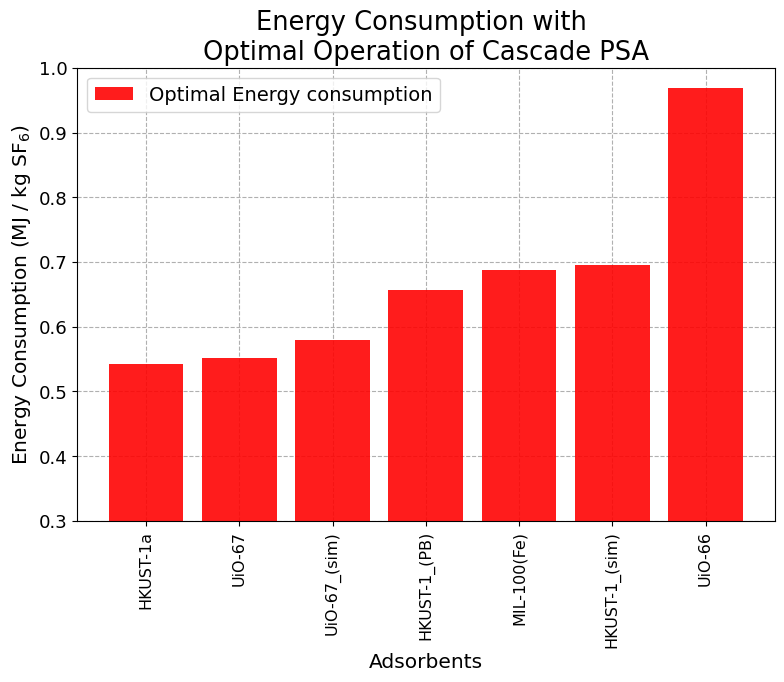

[ 79221.62424984  80462.74573853  84608.35754816  95929.75482817
 100322.68188289 101554.18394862 141606.91779923]


In [72]:
E_consu_arr = np.array(E_consu_list)
E_consu_arr = np.reshape(E_consu_arr, [-1,])
arg_sort_e = np.argsort(E_consu_arr)

E_consu_sort = E_consu_arr[arg_sort_e]
Names_sort_e = Names_xcut[arg_sort_e]
dH_sort_e = dH_xcut[arg_sort_e]
bins_sort_e = bins_xcut[arg_sort_e]
Popt_sort_e = np.array(P_opt_list)[arg_sort_e]

fig_e, ax_e = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bargraph_onoff = [True,]*len(E_consu_list)
#bargraph_onoff[1] = False
#bargraph_onoff[3] = False

#bar1 = ax_e.bar(np.arange(len(E_consu_arr))[bargraph_onoff],E_consu_sort[bargraph_onoff]/146060,
#                color = 'r', alpha = 0.89,
#                label = 'Optimal Energy consumption')

bar1 = ax_e.bar(np.arange(np.sum(bargraph_onoff)),E_consu_sort[bargraph_onoff]/146060,
                color = 'r', alpha = 0.89,
                label = 'Optimal Energy consumption')


ax_e.set_ylabel('Energy Consumption (MJ / kg SF$_6$)',fontsize = 14.5)
ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Energy Consumption with \nOptimal Operation of Cascade PSA',fontsize = 18.5)


#ax_e.set_xticks(np.arange(len(Names_xcut)))
#ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 11.5)

ax_e.set_xticks(np.arange(np.sum(bargraph_onoff)))
ax_e.set_xticklabels(Names_sort_e[bargraph_onoff],rotation = 90,fontsize= 11.5)

plt.yticks(fontsize = 13)

ax_e.set_ylim([0.3,1])
#ax_e.set_xlim([-1,len(E_consu_list)])
frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
plt.legend(fontsize = 14,loc = 'upper left')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

print(E_consu_sort)

In [62]:
for nn,ee in zip(Names_sort_e, E_consu_sort/146060):
    print('{0:15s} :  {1:8.4f} MJ/SF6 kg'.format(nn,ee))

HKUST-1a        :    0.5424 MJ/SF6 kg
UiO-67          :    0.5509 MJ/SF6 kg
UiO-67_(sim)    :    0.5793 MJ/SF6 kg
HKUST-1_(PB)    :    0.6568 MJ/SF6 kg
MIL-100(Fe)     :    0.6869 MJ/SF6 kg
HKUST-1_(sim)   :    0.6953 MJ/SF6 kg
UiO-66          :    0.9695 MJ/SF6 kg


In [63]:
Popt_sort_e
print('{0:15s} :  {1:12s}   {2:12s} bar'.format('Name','1st pressure', '2nd pressure'))
for nn,pp12 in zip(Names_sort_e, Popt_sort_e):
    print('{0:15s} :  {1:8.4f} bar / {2:8.4f} bar'.format(nn,pp12[0], pp12[1]))


Name            :  1st pressure   2nd pressure bar
HKUST-1a        :    3.5000 bar /   7.8483 bar
UiO-67          :    3.4999 bar /   8.7335 bar
UiO-67_(sim)    :    5.0027 bar /   5.6414 bar
HKUST-1_(PB)    :    5.6670 bar /   7.8733 bar
MIL-100(Fe)     :    6.4237 bar /   7.3640 bar
HKUST-1_(sim)   :    6.5627 bar /   7.5028 bar
UiO-66          :    9.5373 bar /  22.9752 bar


Text(0.5, 0, 'Adsorbents')

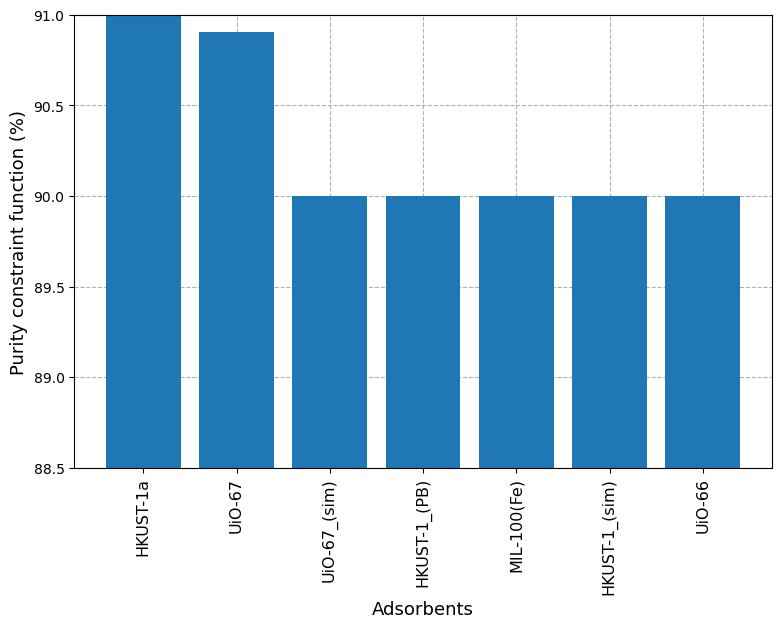

In [64]:
xx_sort_E = np.reshape(np.array(xx_opt_list)[arg_sort_e],-1)

fig_pu,ax_pu=plt.subplots(figsize = [9,6],dpi = 100)
ax_pu.set_axisbelow(True)
plt.grid(which = 'major', linestyle = '--')


plt.bar(np.arange(len(xx_sort_E)),xx_sort_E)
plt.xticks(np.arange(len(xx_sort_E)),
          labels = Names_sort_e,fontsize = 11.5,
           rotation = 90)
plt.ylim([88.5,91])
plt.ylabel('Purity constraint function (%)',fontsize = 13)
plt.xlabel('Adsorbents',fontsize = 13)


## Save above data

In [65]:
E_sav = np.reshape(E_consu_sort,[-1,1])
Nam_sav= np.reshape(Names_sort_e,[-1,1])


In [66]:
Mat2save = np.concatenate((Nam_sav,E_sav),1)
pd.DataFrame(Mat2save).to_excel('SecNum_12_1_E_Casc.xlsx')

# Position of Optimal Pressure

## Setting for 3 x 3 Graphs : Cascade purity

In [67]:
P1_rang = np.linspace(4,10,6*4+1)
P2_rang = np.linspace(4,10,6*4+1)
#P1_rang = np.linspace(3,20,3)
#P2_rang = np.linspace(3,20,3)

## Reference Temperature ##
Tref_tmp = [298,298]

## Feed Conditiosn ##
Pfeed_tmp = 1
yfeed_tmp = [0.1,0.9]
Tfeed_tmp = 313

## Intermediate pressure ##
Plow_tmp = 1
## Number of Andsorbent to show
N_show = 4
N_row = 2
N_column = np.int32(N_show/N_row)
#print(N_column)

In [68]:
print(Names_sort_e)

['HKUST-1a' 'UiO-67' 'UiO-67_(sim)' 'HKUST-1_(PB)' 'MIL-100(Fe)'
 'HKUST-1_(sim)' 'UiO-66']


## 3 x 3 Graphs : Cascade purity

C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure
<ipython-input-230-342b8ab23dd3>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_all.show()


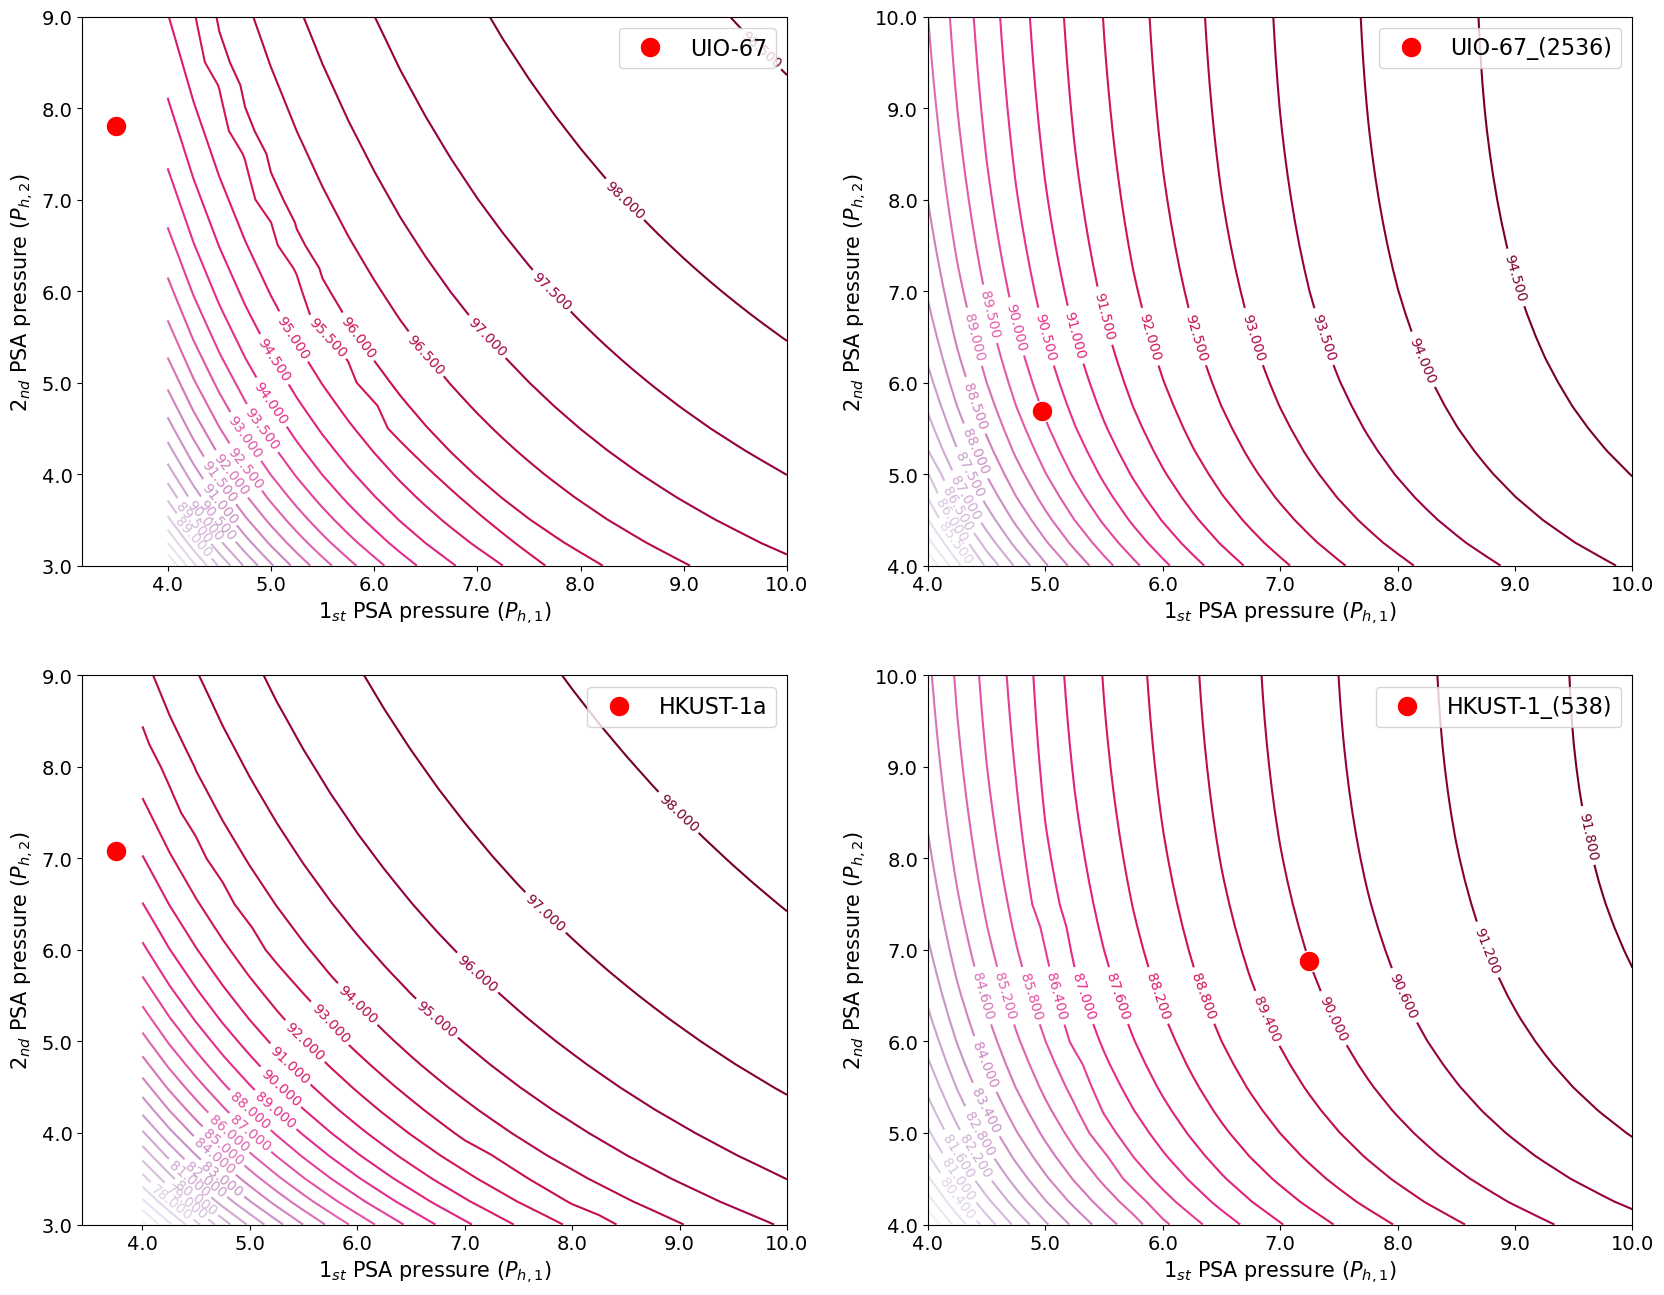

In [230]:
fig_all, ax_all = plt.subplots(N_row,N_column,
                               figsize = [20,16],
                               dpi = 100)
axx = 0
axy = 0
iiii = 0
for binnn,dHHH, Nameee in zip(bins_sort_e[:N_show],
                              dH_sort_e[:N_show],
                              Names_sort_e[:N_show]):
    x_bg_2D_list = []
    for ppp1 in P1_rang:
        x_bg_list_tmp = []
        for ppp2 in P2_rang:
            x_bg = consPSA2(ppp1,ppp2,Plow_tmp,Pfeed_tmp, binnn, dHHH,
                            Tref_tmp,yfeed_tmp,Tfeed_tmp)
            x_bg_list_tmp.append(x_bg[0])
        x_bg_2D_list.append(x_bg_list_tmp)
    
    x_bg_arr = np.array(x_bg_2D_list)
    
    ctr_tmp = ax_all[axx,axy].contour(P1_rang,P2_rang,x_bg_arr.T*100,
                                      levels = 25,cmap="PuRd")
    #ctr2 = ax2.contour(Ph1_arr,Ph2_arr,Rec_res_arr,levels = 25,colors= 'k')
    #fig_all.colorbar(ctr_tmp,ax = ax_all[axx,axy])

    ax_all[axx,axy].clabel(ctr_tmp)
#    if iiii == 3:
#        ax_all[axx,axy].plot(4.8,P_opt_list[iiii][1], 'o',
#                             label = '{0:5d}'.format(Nameee),
#                             markersize = 15, markerfacecolor = 'r',
#                             markeredgecolor = [1,1,1])
#    elif iiii == 5:
#        ax_all[axx,axy].plot(4.95,P_opt_list[iiii][1], 'o',
#                             label = '{0:5d}'.format(Nameee),
#                             markersize = 15, markerfacecolor = 'r',
#                             markeredgecolor = [1,1,1])
#    else:
    ax_all[axx,axy].plot(Popt_sort_e[iiii][0],Popt_sort_e[iiii][1], 'o',
                         label = '{0:5s}'.format(Nameee),
                         markersize = 15, markerfacecolor = 'r',
                         markeredgecolor = [1,1,1])
    
    ax_all[axx,axy].legend(fontsize = 16)

    ax_all[axx,axy].set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 15)
    ax_all[axx,axy].set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 15)
    #ax_all[axx,axy].set_title('{0:6d}'.format(Nameee),fontsize = 20)
    xtt = ax_all[axx,axy].get_xticks()
    ytt = ax_all[axx,axy].get_xticks()
    ax_all[axx,axy].set_xticklabels(xtt,fontsize = 14)
    ax_all[axx,axy].set_yticklabels(ytt,fontsize = 14)
    iiii = iiii +1 
    axy = axy+1
    if axy >= N_row:
        axy = 0
        axx = axx+1
        
#fig_all.savefig('All_purity_w_opt.png')
fig_all.show()



In [52]:
print(x_bg_2D_list)

[[0.6464462242471649, 0.6720488980610403, 0.6933559879509226, 0.7101629724965376, 0.7250865932893134, 0.7379849391107521, 0.7485311411724334, 0.7574908724144995, 0.7651466127020559, 0.7717263958705936, 0.7774137597594267, 0.7823565457027228, 0.7875747761217903, 0.7914210478952739, 0.7948133312909127, 0.7978170554121918, 0.8004863100850781, 0.8028660824394867, 0.8049940124841745, 0.8069017763555391, 0.8086161806656091], [0.6768630795358728, 0.7, 0.7200337704622648, 0.736649560280184, 0.7501373819531981, 0.7613624330919911, 0.7707640239821719, 0.7786931009500253, 0.7862954914766278, 0.7921389806160821, 0.79717181625805, 0.8015321088765758, 0.8053302844549337, 0.8086552299923829, 0.811579005825044, 0.8141604531188377, 0.8164479625148641, 0.8184816067315196, 0.8202947926958674, 0.821915548299644, 0.8233675316420251], [0.7027431357556274, 0.7251885847769626, 0.7439031818598236, 0.758811363757841, 0.7710193239303615, 0.781882963573045, 0.7903772086449349, 0.7975083635055712, 0.80354266631286

## Settings for 2 x 2 Graphs : Cascade purity

In [53]:
P1_rang = np.linspace(3,8,5*10+1)
P2_rang = np.linspace(3,8,5*10+1)
#P1_rang = np.linspace(3,20,3)
#P2_rang = np.linspace(3,20,3)

## Reference Temperature ##
Tref_tmp = [298,298]

## Feed Conditiosn ##
Pfeed_tmp = 1
yfeed_tmp = [0.1,0.9]
Tfeed_tmp = 313

## Intermediate pressure ##
Plow_tmp = 1
## Number of Andsorbent to show
N_show = 4
N_row = 2
N_column = np.int32(N_show/N_row)
#print(N_column)

## 2 x 2 Graphs : Cascade purity

<ipython-input-54-6d7b23d925bf>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_all.show()


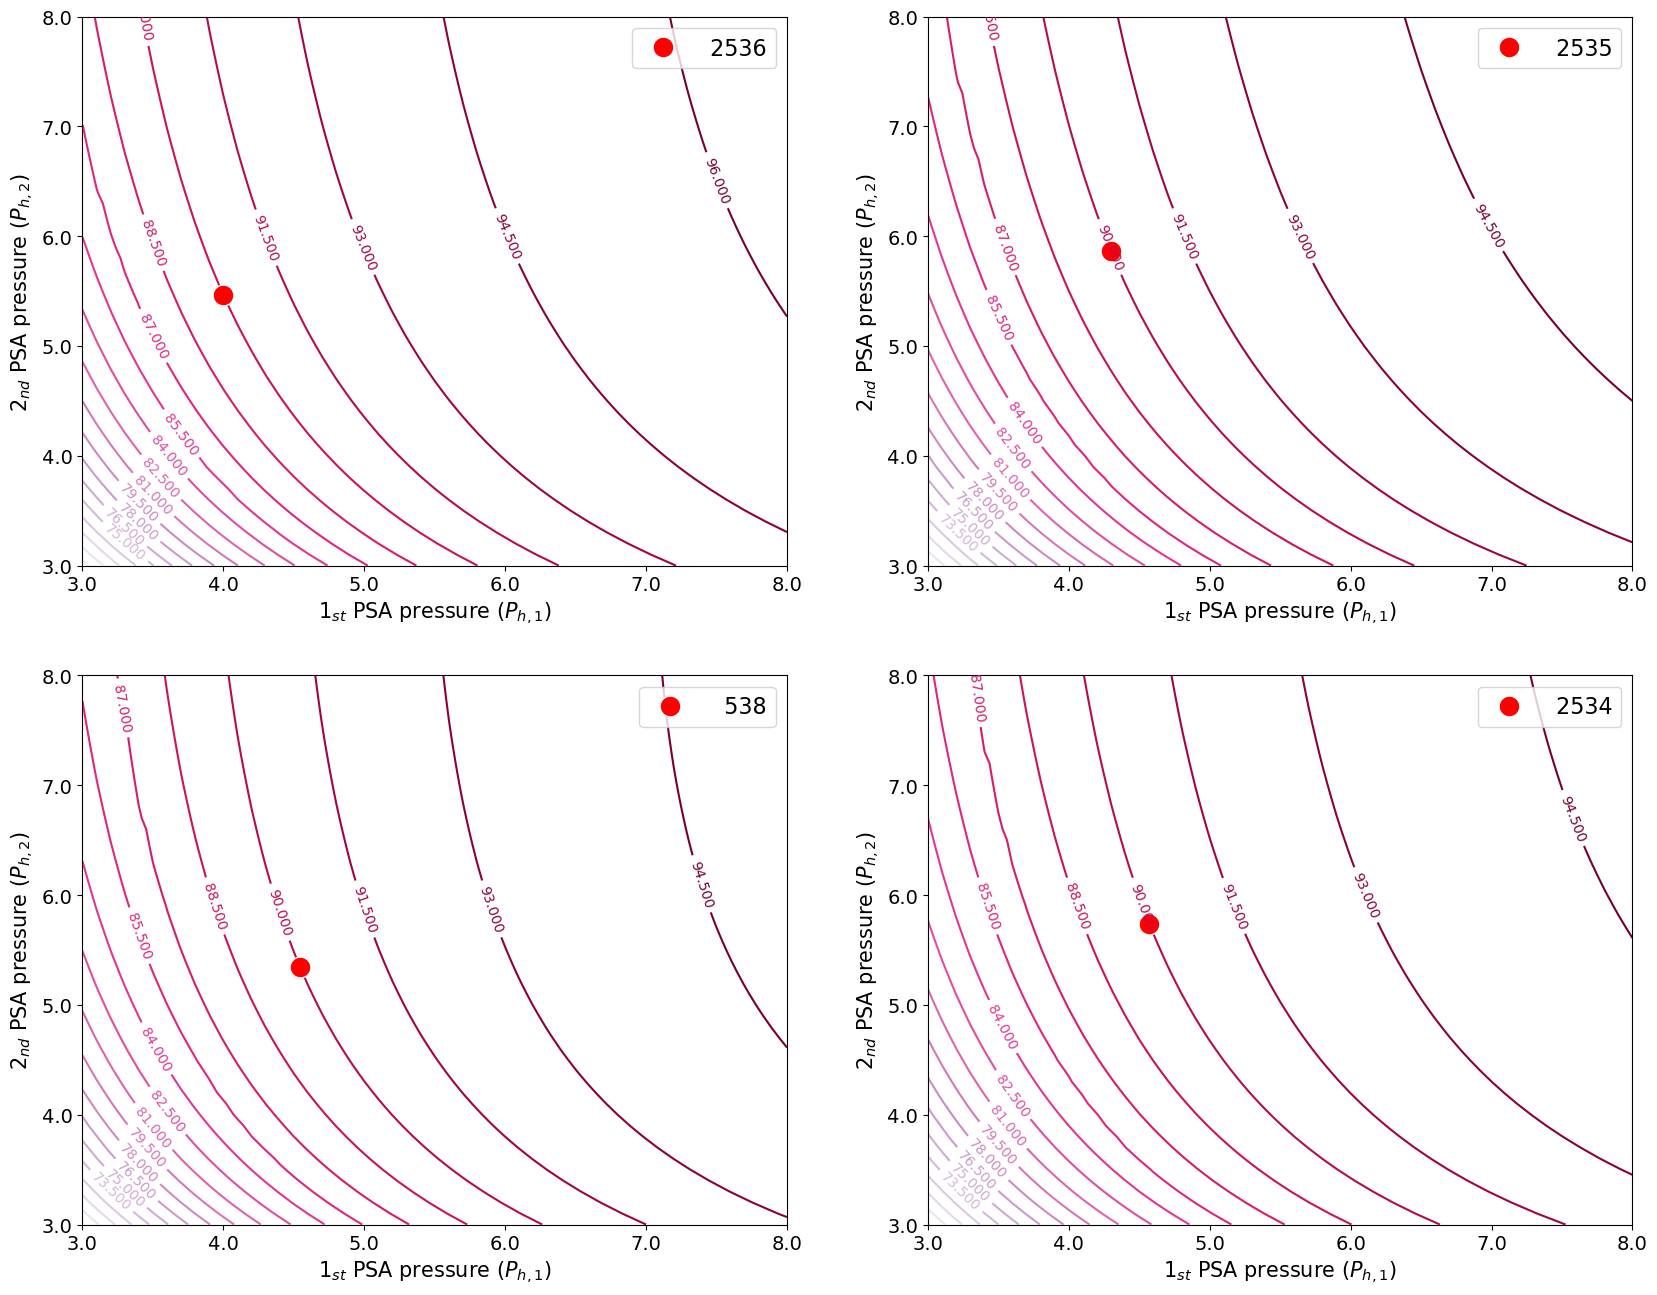

In [54]:
fig_all, ax_all = plt.subplots(N_row,N_column,
                               figsize = [20,16],
                               dpi = 100)
axx = 0
axy = 0
iiii = 0
for binnn,dHHH, Nameee in zip(bins_sort_e[:N_show],
                              dH_sort_e[:N_show],
                              Names_sort_e[:N_show]):
    x_bg_2D_list = []
    for ppp1 in P1_rang:
        x_bg_list_tmp = []
        for ppp2 in P2_rang:
            x_bg = consPSA2(ppp1,ppp2,Plow_tmp,Pfeed_tmp, binnn, dHHH,
                            Tref_tmp,yfeed_tmp,Tfeed_tmp)
            x_bg_list_tmp.append(x_bg[0])
        x_bg_2D_list.append(x_bg_list_tmp)
    
    x_bg_arr = np.array(x_bg_2D_list)
    
    ctr_tmp = ax_all[axx,axy].contour(P1_rang,P2_rang,x_bg_arr.T*100,
                                      levels = 25,cmap="PuRd")
    #ctr2 = ax2.contour(Ph1_arr,Ph2_arr,Rec_res_arr,levels = 25,colors= 'k')
    #fig_all.colorbar(ctr_tmp,ax = ax_all[axx,axy])

    ax_all[axx,axy].clabel(ctr_tmp)
#    if iiii == 3:
#        ax_all[axx,axy].plot(4.8,P_opt_list[iiii][1], 'o',
#                             label = '{0:5d}'.format(Nameee),
#                             markersize = 15, markerfacecolor = 'r',
#                             markeredgecolor = [1,1,1])
#    elif iiii == 5:
#        ax_all[axx,axy].plot(4.95,P_opt_list[iiii][1], 'o',
#                             label = '{0:5d}'.format(Nameee),
#                             markersize = 15, markerfacecolor = 'r',
#                             markeredgecolor = [1,1,1])
#    else:
    ax_all[axx,axy].plot(Popt_sort_e[iiii][0],Popt_sort_e[iiii][1], 'o',
                         label = '{0:5d}'.format(Nameee),
                         markersize = 15, markerfacecolor = 'r',
                         markeredgecolor = [1,1,1])
    
    ax_all[axx,axy].legend(fontsize = 16)

    ax_all[axx,axy].set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 15)
    ax_all[axx,axy].set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 15)
    #ax_all[axx,axy].set_title('{0:6d}'.format(Nameee),fontsize = 20)
    xtt = ax_all[axx,axy].get_xticks()
    ytt = ax_all[axx,axy].get_xticks()
    ax_all[axx,axy].set_xticklabels(xtt,fontsize = 14)
    ax_all[axx,axy].set_yticklabels(ytt,fontsize = 14)
    iiii = iiii +1 
    axy = axy+1
    if axy >= N_row:
        axy = 0
        axx = axx+1
        
#fig_all.savefig('All_purity_w_opt.png')
fig_all.show()


## Scatter: Optimal pressure

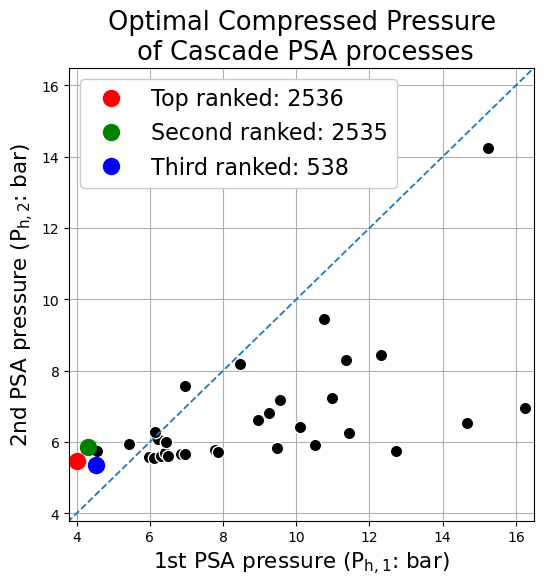

In [55]:
fig_scc,ax_scc=plt.subplots(figsize = [6,6],dpi = 100)
plt.grid()
ax_scc.set_axisbelow(True)
plt.scatter(Popt_sort_e[:,0],Popt_sort_e[:,1],color = 'k',s = 80,edgecolors = 'white')

plt.xlabel(r'1st PSA pressure (P$_{\rm h,1}$: bar)',fontsize = 15.5)
plt.ylabel(r'2nd PSA pressure (P$_{\rm h,2}$: bar)',fontsize = 15.5)
plt.plot(Popt_sort_e[0,0], Popt_sort_e[0,1],'ro',
         label  = 'Top ranked: {}'.format(Names_sort_e[0]), markersize = 11.5 )
plt.plot(Popt_sort_e[1,0], Popt_sort_e[1,1],'go',
         label = 'Second ranked: {}'.format(Names_sort_e[1]), markersize = 11.5)
plt.plot(Popt_sort_e[2,0], Popt_sort_e[2,1],'bo',
         label = 'Third ranked: {}'.format(Names_sort_e[2]), markersize = 11.5)

plt.xlim([3.8, 16.5])
plt.ylim([3.8, 16.5])
plt.title('Optimal Compressed Pressure\n of Cascade PSA processes',
         fontsize = 18.5)
plt.legend(fontsize = 16,loc = 2,fancybox=True, framealpha=1)

xli = np.linspace(3,20)
yli = np.linspace(3,20)
plt.plot(xli,yli,'--',linewidth = 1.3)

## Save Above data (Opt. Pressure)

In [56]:
#P_sav = np.reshape(Popt_sort_e,[-1,2])
Nam_sav= np.reshape(Names_sort_e,[-1,1])
Mat2save = np.concatenate((Nam_sav,Popt_sort_e),1)
pd.DataFrame(Mat2save).to_excel('SecNum_13_5_P_opt.xlsx')

# First PSA purity

In [57]:
x_PSA1 = []
for binnn,dHHH, Nameee, P1_optt in zip(bins_sort_e,
                                       dH_sort_e,
                                       Names_sort_e, Popt_sort_e[:,0]):
    #print(Nameee)
    rec_tmp,l_ind,x_tmp = rec(x_guess[0], P1_optt,1,
                              binnn, dHHH, T_tri,y_feed_in, T_feed_in)
    x_PSA1.append(x_tmp[0])
    #print('=',x_tmp*100)
    print('{0:6d} : {1:8f}'.format(Nameee,x_tmp[0]*100))

    

  2536 : 34.226420
  2535 : 36.053517
   538 : 37.424352
  2534 : 37.730519
  2822 : 40.626328
  2332 : 44.041140
  2280 : 44.455524
  2279 : 44.662551
  2468 : 43.949754
  2419 : 42.627708


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


   385 : 45.175880
   386 : 45.528391
   491 : 44.961486
   388 : 46.277394
   490 : 46.490153
  2819 : 43.322344
   244 : 48.734084
  2147 : 47.928715
  2493 : 48.562821
  2820 : 46.036218
  1540 : 50.129024
  1689 : 48.518697
  2783 : 48.396454
   175 : 50.106152
   193 : 50.845696
  2753 : 49.455777
   387 : 50.931596
  1149 : 47.979495
  2305 : 48.973680
   918 : 52.237617
  2452 : 49.019162
    41 : 52.160784
  2528 : 51.365607
  2784 : 48.213460
  2709 : 50.964435
  2818 : 48.543932


# Optimization Example Graph

## Purifind:Purity 90% calculation

In [58]:
def Purifind(Ph1,Ph2_0,iso_input,dH_input,x_ini_1,x_ini_2):
    def Puri_err(Ph2):
        E_tmp,x_tmp = PSA2(Ph1,Ph2,1,1,
                           iso_input,dH_input,
                           [298,298],[0.1,0.9], 313.15,
                           x_ini_1,x_ini_2)
        return (x_tmp - 0.9)**2
    sol = optim.least_squares(Puri_err,Ph2_0)
    return sol.x

## Computing the Energy and purity

In [59]:
from scipy.interpolate import interp1d

In [60]:
ind_exx =  5
bin_exx = bins_sort_e[ind_exx]
dH_exx = dH_sort_e[ind_exx]
Name_exx = Names_sort_e[ind_exx]
print('Name: ', Name_exx)

P_ran_1 = np.linspace(2.875,10,7*8+2)
P_ran_2 = np.linspace(2.875,10,7*8+2)
P_low_interm = 1
T_tri2 = [298,298]
P_feed2 = 1
y_feed2 = [0.1, 0.9]
T_feed2 = 313

E_ex_2d =[]
x_90_line = []

for p1 in P_ran_1:
    EEE_list = []
    xxx_list = []
    for p2 in P_ran_2:
        try:
            xg1 = 0.3
            xg2 = 0.7
            E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                               bin_exx,dH_exx,T_tri2,
                               y_feed2,T_feed2,xg1,xg2)
        except:
            try:
                xg1 = 0.4
                xg2 = 0.75
                E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                   bin_exx,dH_dH_exx,T_tri2,
                                   y_feed2,T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.4
                    xg2 = 0.85
                    E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                       bin_exx,dH_exx,T_tri2,
                                       y_feed2,T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.7
                        xg2 = 0.90
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_exx,dH_exx,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)
                    except:
                        xg1 = 0.8
                        xg2 = 0.98
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_exx,dH_exx,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)

        EEE_list.append(E_tmp[0])
        xxx_list.append(x_tmp[0])
        print(p1,p2)
    arg_xxx_90 = np.argmin((np.array(xxx_list)- 0.9)**2)
    try:
        f_inter = interp1d(xxx_list,
                           P_ran_2)
        p90_tmp = f_inter(0.9)
    except:
        if p1 < 7:
            p90_tmp = P_ran_2[-1]*1.1        
        else:
            p90_tmp = P_ran_2[0]*0.9        
    #pp2_0 = P_ran_2[arg_xxx_90]
    #p90_tmp = Purifind(p1,pp2_0,bin_exx,dH_exx,xg1,xg2)       
    E_ex_2d.append(EEE_list)
    x_90_line.append(p90_tmp)



Name:  2332
2.875 2.875
2.875 3.0
2.875 3.125
2.875 3.25
2.875 3.375
2.875 3.5
2.875 3.625
2.875 3.75
2.875 3.875
2.875 4.0
2.875 4.125
2.875 4.25
2.875 4.375
2.875 4.5
2.875 4.625
2.875 4.75
2.875 4.875
2.875 5.0
2.875 5.125
2.875 5.25
2.875 5.375
2.875 5.5
2.875 5.625
2.875 5.75
2.875 5.875
2.875 6.0
2.875 6.125
2.875 6.25
2.875 6.375
2.875 6.5
2.875 6.625
2.875 6.75
2.875 6.875
2.875 7.0
2.875 7.125
2.875 7.25
2.875 7.375
2.875 7.5
2.875 7.625
2.875 7.75
2.875 7.875
2.875 8.0
2.875 8.125
2.875 8.25
2.875 8.375
2.875 8.5
2.875 8.625
2.875 8.75
2.875 8.875
2.875 9.0
2.875 9.125
2.875 9.25
2.875 9.375
2.875 9.5
2.875 9.625
2.875 9.75
2.875 9.875
2.875 10.0
3.0 2.875
3.0 3.0
3.0 3.125
3.0 3.25
3.0 3.375
3.0 3.5
3.0 3.625
3.0 3.75
3.0 3.875
3.0 4.0
3.0 4.125
3.0 4.25
3.0 4.375
3.0 4.5
3.0 4.625
3.0 4.75
3.0 4.875
3.0 5.0
3.0 5.125
3.0 5.25
3.0 5.375
3.0 5.5
3.0 5.625
3.0 5.75
3.0 5.875
3.0 6.0
3.0 6.125
3.0 6.25
3.0 6.375
3.0 6.5
3.0 6.625
3.0 6.75
3.0 6.875
3.0 7.0
3.0 7.125
3.0 7.25
3.

6.125 9.5
6.125 9.625
6.125 9.75
6.125 9.875
6.125 10.0
6.25 2.875
6.25 3.0
6.25 3.125
6.25 3.25
6.25 3.375
6.25 3.5
6.25 3.625
6.25 3.75
6.25 3.875
6.25 4.0
6.25 4.125
6.25 4.25
6.25 4.375
6.25 4.5
6.25 4.625
6.25 4.75
6.25 4.875
6.25 5.0
6.25 5.125
6.25 5.25
6.25 5.375
6.25 5.5
6.25 5.625
6.25 5.75
6.25 5.875
6.25 6.0
6.25 6.125
6.25 6.25
6.25 6.375
6.25 6.5
6.25 6.625
6.25 6.75
6.25 6.875
6.25 7.0
6.25 7.125
6.25 7.25
6.25 7.375
6.25 7.5
6.25 7.625
6.25 7.75
6.25 7.875
6.25 8.0
6.25 8.125
6.25 8.25
6.25 8.375
6.25 8.5
6.25 8.625
6.25 8.75
6.25 8.875
6.25 9.0
6.25 9.125
6.25 9.25
6.25 9.375
6.25 9.5
6.25 9.625
6.25 9.75
6.25 9.875
6.25 10.0
6.375 2.875
6.375 3.0
6.375 3.125
6.375 3.25
6.375 3.375
6.375 3.5
6.375 3.625
6.375 3.75
6.375 3.875
6.375 4.0
6.375 4.125
6.375 4.25
6.375 4.375
6.375 4.5
6.375 4.625
6.375 4.75
6.375 4.875
6.375 5.0
6.375 5.125
6.375 5.25
6.375 5.375
6.375 5.5
6.375 5.625
6.375 5.75
6.375 5.875
6.375 6.0
6.375 6.125
6.375 6.25
6.375 6.375
6.375 6.5
6.375 6.625


7.875 5.625
7.875 5.75
7.875 5.875
7.875 6.0
7.875 6.125
7.875 6.25
7.875 6.375
7.875 6.5
7.875 6.625
7.875 6.75
7.875 6.875
7.875 7.0
7.875 7.125
7.875 7.25
7.875 7.375
7.875 7.5
7.875 7.625
7.875 7.75
7.875 7.875
7.875 8.0
7.875 8.125
7.875 8.25
7.875 8.375
7.875 8.5
7.875 8.625
7.875 8.75
7.875 8.875
7.875 9.0
7.875 9.125
7.875 9.25
7.875 9.375
7.875 9.5
7.875 9.625
7.875 9.75
7.875 9.875
7.875 10.0
8.0 2.875
8.0 3.0
8.0 3.125
8.0 3.25
8.0 3.375
8.0 3.5
8.0 3.625
8.0 3.75
8.0 3.875
8.0 4.0
8.0 4.125
8.0 4.25
8.0 4.375
8.0 4.5
8.0 4.625
8.0 4.75
8.0 4.875
8.0 5.0
8.0 5.125
8.0 5.25
8.0 5.375
8.0 5.5
8.0 5.625
8.0 5.75
8.0 5.875
8.0 6.0
8.0 6.125
8.0 6.25
8.0 6.375
8.0 6.5
8.0 6.625
8.0 6.75
8.0 6.875
8.0 7.0
8.0 7.125
8.0 7.25
8.0 7.375
8.0 7.5
8.0 7.625
8.0 7.75
8.0 7.875
8.0 8.0
8.0 8.125
8.0 8.25
8.0 8.375
8.0 8.5
8.0 8.625
8.0 8.75
8.0 8.875
8.0 9.0
8.0 9.125
8.0 9.25
8.0 9.375
8.0 9.5
8.0 9.625
8.0 9.75
8.0 9.875
8.0 10.0
8.125 2.875
8.125 3.0
8.125 3.125
8.125 3.25
8.125 3.375


9.5 9.75
9.5 9.875
9.5 10.0
9.625 2.875
9.625 3.0
9.625 3.125
9.625 3.25
9.625 3.375
9.625 3.5
9.625 3.625
9.625 3.75
9.625 3.875
9.625 4.0
9.625 4.125
9.625 4.25
9.625 4.375
9.625 4.5
9.625 4.625
9.625 4.75
9.625 4.875
9.625 5.0
9.625 5.125
9.625 5.25
9.625 5.375
9.625 5.5
9.625 5.625
9.625 5.75
9.625 5.875
9.625 6.0
9.625 6.125
9.625 6.25
9.625 6.375
9.625 6.5
9.625 6.625
9.625 6.75
9.625 6.875
9.625 7.0
9.625 7.125
9.625 7.25
9.625 7.375
9.625 7.5
9.625 7.625
9.625 7.75
9.625 7.875
9.625 8.0
9.625 8.125
9.625 8.25
9.625 8.375
9.625 8.5
9.625 8.625
9.625 8.75
9.625 8.875
9.625 9.0
9.625 9.125
9.625 9.25
9.625 9.375
9.625 9.5
9.625 9.625
9.625 9.75
9.625 9.875
9.625 10.0
9.75 2.875
9.75 3.0
9.75 3.125
9.75 3.25
9.75 3.375
9.75 3.5
9.75 3.625
9.75 3.75
9.75 3.875
9.75 4.0
9.75 4.125
9.75 4.25
9.75 4.375
9.75 4.5
9.75 4.625
9.75 4.75
9.75 4.875
9.75 5.0
9.75 5.125
9.75 5.25
9.75 5.375
9.75 5.5
9.75 5.625
9.75 5.75
9.75 5.875
9.75 6.0
9.75 6.125
9.75 6.25
9.75 6.375
9.75 6.5
9.75 6.625
9

In [61]:
print('Name: ', Name_exx)

Name:  2332


In [66]:
ind_exx00 = 0
Popt_sort_e[ind_exx00]

array([3.99998708, 5.46392078])

In [67]:
ind_exx =  0
#ind_exx =  10
bin_exx = bins_sort_e[ind_exx]
dH_exx = dH_sort_e[ind_exx]
Name_exx = Names_sort_e[ind_exx]
print('Name: ', Name_exx)

P_ran_1 = np.linspace(2.875,10,7*8+2)
P_ran_2 = np.linspace(2.875,10,7*8+2)
P_low_interm = 1
T_tri2 = [298,298]
P_feed2 = 1
y_feed2 = [0.1, 0.9]
T_feed2 = 313

E_ex_2d =[]
x_ex_2d = []
x_90_line = []

for p1 in P_ran_1:
    EEE_list = []
    xxx_list = []
    for p2 in P_ran_2:
        try:
            xg1 = 0.3
            xg2 = 0.7
            E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                               bin_exx,dH_exx,T_tri2,
                               y_feed2,T_feed2,xg1,xg2)
        except:
            try:
                xg1 = 0.4
                xg2 = 0.75
                E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                   bin_exx,dH_dH_exx,T_tri2,
                                   y_feed2,T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.4
                    xg2 = 0.85
                    E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                       bin_exx,dH_exx,T_tri2,
                                       y_feed2,T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.7
                        xg2 = 0.90
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_exx,dH_exx,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)
                    except:
                        xg1 = 0.8
                        xg2 = 0.98
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_exx,dH_exx,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)

        EEE_list.append(E_tmp[0])
        xxx_list.append(x_tmp[0])
        print(p1,p2)
    arg_xxx_90 = np.argmin((np.array(xxx_list)- 0.9)**2)
    try:
        f_inter = interp1d(xxx_list,
                           P_ran_2)
        p90_tmp = f_inter(0.9)
    except:
        if p1 < 7:
            p90_tmp = P_ran_2[-1]*1.1        
        else:
            p90_tmp = P_ran_2[0]*0.9        
    #pp2_0 = P_ran_2[arg_xxx_90]
    #p90_tmp = Purifind(p1,pp2_0,bin_exx,dH_exx,xg1,xg2)       
    E_ex_2d.append(EEE_list)
    x_ex_2d.append(xxx_list)
    x_90_line.append(p90_tmp)

Name:  2536
2.875 2.875
2.875 3.0
2.875 3.125
2.875 3.25
2.875 3.375
2.875 3.5
2.875 3.625
2.875 3.75
2.875 3.875
2.875 4.0
2.875 4.125
2.875 4.25
2.875 4.375
2.875 4.5
2.875 4.625
2.875 4.75
2.875 4.875
2.875 5.0
2.875 5.125
2.875 5.25
2.875 5.375
2.875 5.5
2.875 5.625
2.875 5.75
2.875 5.875
2.875 6.0
2.875 6.125
2.875 6.25
2.875 6.375
2.875 6.5
2.875 6.625
2.875 6.75
2.875 6.875
2.875 7.0
2.875 7.125
2.875 7.25
2.875 7.375
2.875 7.5
2.875 7.625
2.875 7.75
2.875 7.875
2.875 8.0
2.875 8.125
2.875 8.25
2.875 8.375
2.875 8.5
2.875 8.625
2.875 8.75
2.875 8.875
2.875 9.0
2.875 9.125
2.875 9.25
2.875 9.375
2.875 9.5
2.875 9.625
2.875 9.75
2.875 9.875
2.875 10.0
3.0 2.875
3.0 3.0
3.0 3.125
3.0 3.25
3.0 3.375
3.0 3.5
3.0 3.625
3.0 3.75
3.0 3.875
3.0 4.0
3.0 4.125
3.0 4.25
3.0 4.375
3.0 4.5
3.0 4.625
3.0 4.75
3.0 4.875
3.0 5.0
3.0 5.125
3.0 5.25
3.0 5.375
3.0 5.5
3.0 5.625
3.0 5.75
3.0 5.875
3.0 6.0
3.0 6.125
3.0 6.25
3.0 6.375
3.0 6.5
3.0 6.625
3.0 6.75
3.0 6.875
3.0 7.0
3.0 7.125
3.0 7.25
3.

4.5 6.125
4.5 6.25
4.5 6.375
4.5 6.5
4.5 6.625
4.5 6.75
4.5 6.875
4.5 7.0
4.5 7.125
4.5 7.25
4.5 7.375
4.5 7.5
4.5 7.625
4.5 7.75
4.5 7.875
4.5 8.0
4.5 8.125
4.5 8.25
4.5 8.375
4.5 8.5
4.5 8.625
4.5 8.75
4.5 8.875
4.5 9.0
4.5 9.125
4.5 9.25
4.5 9.375
4.5 9.5
4.5 9.625
4.5 9.75
4.5 9.875
4.5 10.0
4.625 2.875
4.625 3.0
4.625 3.125
4.625 3.25
4.625 3.375
4.625 3.5
4.625 3.625
4.625 3.75
4.625 3.875
4.625 4.0
4.625 4.125
4.625 4.25
4.625 4.375
4.625 4.5
4.625 4.625
4.625 4.75
4.625 4.875
4.625 5.0
4.625 5.125
4.625 5.25
4.625 5.375
4.625 5.5
4.625 5.625
4.625 5.75
4.625 5.875
4.625 6.0
4.625 6.125
4.625 6.25
4.625 6.375
4.625 6.5
4.625 6.625
4.625 6.75
4.625 6.875
4.625 7.0
4.625 7.125
4.625 7.25
4.625 7.375
4.625 7.5
4.625 7.625
4.625 7.75
4.625 7.875
4.625 8.0
4.625 8.125
4.625 8.25
4.625 8.375
4.625 8.5
4.625 8.625
4.625 8.75
4.625 8.875
4.625 9.0
4.625 9.125
4.625 9.25
4.625 9.375
4.625 9.5
4.625 9.625
4.625 9.75
4.625 9.875
4.625 10.0
4.75 2.875
4.75 3.0
4.75 3.125
4.75 3.25
4.75 3.37

C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


5.5 10.0
5.625 2.875
5.625 3.0
5.625 3.125
5.625 3.25
5.625 3.375
5.625 3.5
5.625 3.625
5.625 3.75
5.625 3.875
5.625 4.0
5.625 4.125
5.625 4.25
5.625 4.375
5.625 4.5
5.625 4.625
5.625 4.75
5.625 4.875
5.625 5.0
5.625 5.125
5.625 5.25
5.625 5.375
5.625 5.5
5.625 5.625
5.625 5.75
5.625 5.875
5.625 6.0
5.625 6.125
5.625 6.25
5.625 6.375
5.625 6.5
5.625 6.625
5.625 6.75
5.625 6.875
5.625 7.0
5.625 7.125
5.625 7.25
5.625 7.375
5.625 7.5
5.625 7.625
5.625 7.75
5.625 7.875
5.625 8.0
5.625 8.125
5.625 8.25
5.625 8.375
5.625 8.5
5.625 8.625
5.625 8.75
5.625 8.875
5.625 9.0
5.625 9.125
5.625 9.25
5.625 9.375
5.625 9.5
5.625 9.625
5.625 9.75
5.625 9.875
5.625 10.0
5.75 2.875
5.75 3.0
5.75 3.125
5.75 3.25
5.75 3.375
5.75 3.5
5.75 3.625
5.75 3.75
5.75 3.875
5.75 4.0
5.75 4.125
5.75 4.25
5.75 4.375
5.75 4.5
5.75 4.625
5.75 4.75
5.75 4.875
5.75 5.0
5.75 5.125
5.75 5.25
5.75 5.375
5.75 5.5
5.75 5.625
5.75 5.75
5.75 5.875
5.75 6.0
5.75 6.125
5.75 6.25
5.75 6.375
5.75 6.5
5.75 6.625
5.75 6.75
5.75 6.875

7.25 6.125
7.25 6.25
7.25 6.375
7.25 6.5
7.25 6.625
7.25 6.75
7.25 6.875
7.25 7.0
7.25 7.125
7.25 7.25
7.25 7.375
7.25 7.5
7.25 7.625
7.25 7.75
7.25 7.875
7.25 8.0
7.25 8.125
7.25 8.25
7.25 8.375
7.25 8.5
7.25 8.625
7.25 8.75
7.25 8.875
7.25 9.0
7.25 9.125
7.25 9.25
7.25 9.375
7.25 9.5
7.25 9.625
7.25 9.75
7.25 9.875
7.25 10.0
7.375 2.875
7.375 3.0
7.375 3.125
7.375 3.25
7.375 3.375
7.375 3.5
7.375 3.625
7.375 3.75
7.375 3.875
7.375 4.0
7.375 4.125
7.375 4.25
7.375 4.375
7.375 4.5
7.375 4.625
7.375 4.75
7.375 4.875
7.375 5.0
7.375 5.125
7.375 5.25
7.375 5.375
7.375 5.5
7.375 5.625
7.375 5.75
7.375 5.875
7.375 6.0
7.375 6.125
7.375 6.25
7.375 6.375
7.375 6.5
7.375 6.625
7.375 6.75
7.375 6.875
7.375 7.0
7.375 7.125
7.375 7.25
7.375 7.375
7.375 7.5
7.375 7.625
7.375 7.75
7.375 7.875
7.375 8.0
7.375 8.125
7.375 8.25
7.375 8.375
7.375 8.5
7.375 8.625
7.375 8.75
7.375 8.875
7.375 9.0
7.375 9.125
7.375 9.25
7.375 9.375
7.375 9.5
7.375 9.625
7.375 9.75
7.375 9.875
7.375 10.0
7.5 2.875
7.5 3.0


8.875 9.0
8.875 9.125
8.875 9.25
8.875 9.375
8.875 9.5
8.875 9.625
8.875 9.75
8.875 9.875
8.875 10.0
9.0 2.875
9.0 3.0
9.0 3.125
9.0 3.25
9.0 3.375
9.0 3.5
9.0 3.625
9.0 3.75
9.0 3.875
9.0 4.0
9.0 4.125
9.0 4.25
9.0 4.375
9.0 4.5
9.0 4.625
9.0 4.75
9.0 4.875
9.0 5.0
9.0 5.125
9.0 5.25
9.0 5.375
9.0 5.5
9.0 5.625
9.0 5.75
9.0 5.875
9.0 6.0
9.0 6.125
9.0 6.25
9.0 6.375
9.0 6.5
9.0 6.625
9.0 6.75
9.0 6.875
9.0 7.0
9.0 7.125
9.0 7.25
9.0 7.375
9.0 7.5
9.0 7.625
9.0 7.75
9.0 7.875
9.0 8.0
9.0 8.125
9.0 8.25
9.0 8.375
9.0 8.5
9.0 8.625
9.0 8.75
9.0 8.875
9.0 9.0
9.0 9.125
9.0 9.25
9.0 9.375
9.0 9.5
9.0 9.625
9.0 9.75
9.0 9.875
9.0 10.0
9.125 2.875
9.125 3.0
9.125 3.125
9.125 3.25
9.125 3.375
9.125 3.5
9.125 3.625
9.125 3.75
9.125 3.875
9.125 4.0
9.125 4.125
9.125 4.25
9.125 4.375
9.125 4.5
9.125 4.625
9.125 4.75
9.125 4.875
9.125 5.0
9.125 5.125
9.125 5.25
9.125 5.375
9.125 5.5
9.125 5.625
9.125 5.75
9.125 5.875
9.125 6.0
9.125 6.125
9.125 6.25
9.125 6.375
9.125 6.5
9.125 6.625
9.125 6.75
9.

In [74]:
for i in range(26,33):
    x_90_line[i] = 2.5

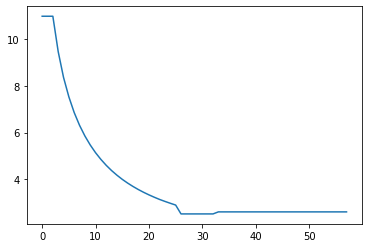

In [75]:
plt.plot(x_90_line)

(3.0, 10.0)

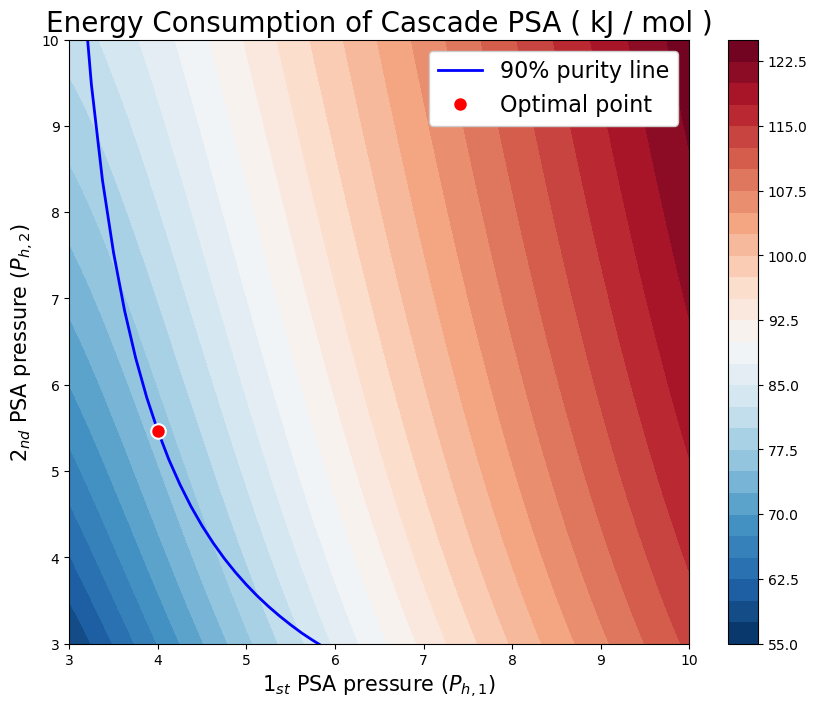

In [76]:


## INTO Array
E_per_n_arr = np.array(E_per_n_2d)
x_prod_arr = np.array(x_prod_2d)

## Graph
fig1,ax1 = plt.subplots(figsize = [10,8],dpi = 100)
ctr1 = ax1.contourf(P_ran_1,P_ran_2,np.array(E_ex_2d).T/1000,levels = 30,cmap="RdBu_r")
ax1.plot(P_ran_1,x_90_line,'b-',linewidth = 2, label = '90% purity line')
ax1.plot(Popt_sort_e[ind_exx][0], Popt_sort_e[ind_exx][1], 'o',
         markerfacecolor = 'r',markeredgecolor = 'white',markeredgewidth = 1.5,
         markersize = 10.5,label='Optimal point' )

fig1.colorbar(ctr1,ax=ax1)
plt.legend(fontsize = 16,loc = 0,fancybox=True, framealpha=1)

#ax1.plot(p1_sort, p2_sort,'b-.',lw = 2.8 )
#ax1.text(6.5,7.4,'Recovery = 70%',
#         fontdict = {'size':12,'color': 'blue','weight':'bold'})
ax1.set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 15)
ax1.set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 15)
ax1.set_title('Energy Consumption of Cascade PSA ( kJ / mol )',fontsize = 20)

## x and y axis
ax1.set_xlim(3,10)
ax1.set_ylim(3,10)
#ax1.set_xticks([5,6,7,8,9,10,11,12])
#ax1.set_yticks([5,6,7,8,9,10,11,12])
#fig1.show()

#fig1.savefig('E_cas_PSA.png')



#plt.contour(P_ran_1,P_ran_2,np.array(E_ex_2d))


## 2D Graph: purity contours

(3.0, 10.0)

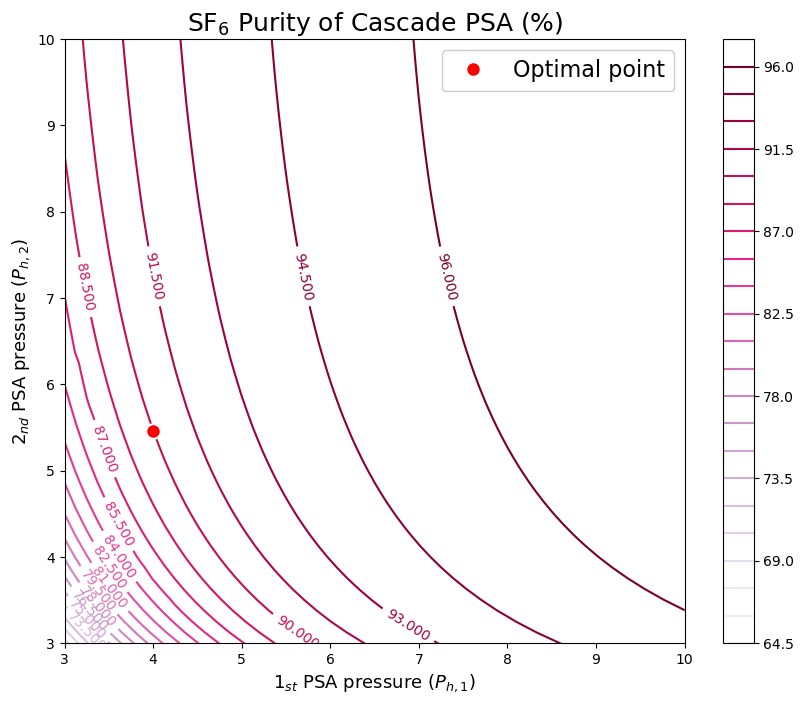

In [77]:
### INTO Array ###
#x_prod_arr = np.array(x_ex_2d)
fig2,ax2 = plt.subplots(figsize = [10,8],dpi = 100)
ctr2 = ax2.contour(P_ran_1,P_ran_2,np.array(x_ex_2d).T*100,levels = 25,cmap="PuRd")

#ax2.plot(P_ran_1,x_90_line,'b-',linewidth = 2, label = '90% purity line')
ax2.plot(Popt_sort_e[ind_exx][0], Popt_sort_e[ind_exx][1], 'o',
         markerfacecolor = 'r',markeredgecolor = 'white',markeredgewidth = 1.5,
         markersize = 10.5,label='Optimal point' )

plt.legend(fontsize = 16,loc = 0,fancybox=True, framealpha=1)
#ctr2 = ax2.contour(Ph1_arr,Ph2_arr,Rec_res_arr,levels = 25,colors= 'k')
fig2.colorbar(ctr2,ax = ax2)

ax2.clabel(ctr2)

ax2.set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 13)
ax2.set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 13)
ax2.set_title('SF$_6$ Purity of Cascade PSA (%)',fontsize = 18)
## x and y axis
ax2.set_xlim(3,10)
ax2.set_ylim(3,10)
#ax2.set_xticks([5,6,7,8,9,10,11,12])
#ax2.set_yticks([5,6,7,8,9,10,11,12])  
#fig2.show()

#fig2.savefig('Purity_cas_PSA.png')

# Purities After 1st and 2nd PSA Trains in Cascade System

## 1st PSA purity

In [74]:
xx_PSA1 = []
for binnn,dHHH, Nameee,popt in zip(bins_sort_e,
                                   dH_sort_e,
                                   Names_sort_e, Popt_sort_e):
    xini_tmpp = 0.3
    try:
        rec_tmp,l_ind,x_tmp = rec(xini_tmpp, popt[0],1,
                                  binnn, dHHH, T_tri,y_feed_in, T_feed_in)
    except:
        try:
            xini_tmpp = 0.5
            rec_tmp,l_ind,x_tmp = rec(xini_tmpp, popt[0],1,binnn, dHHH, T_tri,y_feed_in, T_feed_in)
        except:
            xini_tmpp = 0.8
            rec_tmp,l_ind,x_tmp = rec(xini_tmpp, popt[0],1,binnn, dHHH, T_tri,y_feed_in, T_feed_in)
    xx_PSA1.append(x_tmp[0])


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


## Bar graph: Purities after 1st and 2nd PSA

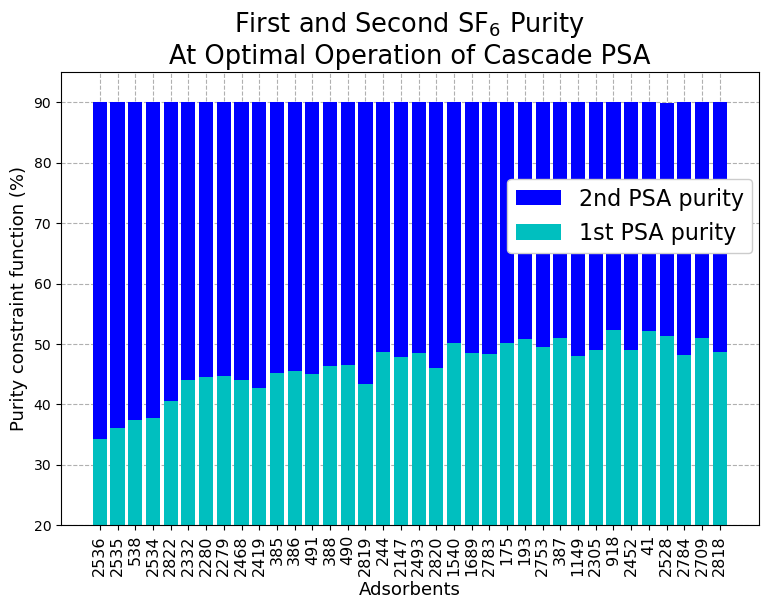

In [110]:
xx_sort_E = np.reshape(np.array(xx_opt_list)[arg_sort_e],-1)

fig_pu,ax_pu=plt.subplots(figsize = [9,6],dpi = 100)
ax_pu.set_axisbelow(True)
plt.grid(which = 'major', linestyle = '--')

plt.bar(np.arange(len(xx_sort_E)),xx_sort_E,
        color= 'b',label = '2nd PSA purity')
plt.bar(np.arange(len(xx_PSA1)),np.array(xx_PSA1)*100,
        color= 'c',label = '1st PSA purity')
plt.xticks(np.arange(len(xx_sort_E)),
          labels = Names_sort_e,fontsize = 11.5,
           rotation = 90)
plt.ylim([20,95])
plt.ylabel('Purity constraint function (%)',fontsize = 13)
plt.xlabel('Adsorbents',fontsize = 13)
plt.title('First and Second SF$_6$ Purity \nAt Optimal Operation of Cascade PSA',fontsize = 18.5)
plt.legend(fontsize = 16,loc = [0.64,0.6],fancybox=True, framealpha=1)